In [1]:
# učitati pakete
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# učitati podatke iz zone_measurements.csv
zone_df = pd.read_csv('zone_measurements.csv', index_col='Timestamp', parse_dates=True)
zone_df.head()

,Unit_ID,Tzgb,Hzgb,CO2zgb,Tqax
Timestamp,,,,,
2016-01-01 00:00:01.314310,6,26.2,25,810,24.21
2016-01-01 00:00:01.585695,5,26.2,27,0,25.40
2016-01-01 00:00:01.555826,11,24.4,27,804,25.42
2016-01-01 00:00:02.303559,9,26.4,25,706,26.06
2016-01-01 00:00:05.149751,23,24.3,32,3773,25.19


In [3]:
# tipovi podataka svakog stupca/varijable
zone_df.dtypes

Unit_ID      int64
Tzgb       float64
Hzgb         int64
CO2zgb       int64
Tqax       float64
dtype: object

In [4]:
# indeks našeg Dataframea
zone_df.index

DatetimeIndex(['2016-01-01 00:00:01.314310', '2016-01-01 00:00:01.585695',
               '2016-01-01 00:00:01.555826', '2016-01-01 00:00:02.303559',
               '2016-01-01 00:00:05.149751', '2016-01-01 00:00:06.550370',
               '2016-01-01 00:00:26.066730', '2016-01-01 00:00:27.027666',
               '2016-01-01 00:00:52.234934', '2016-01-01 00:00:52.234934',
               ...
               '2017-12-31 18:05:49.433800', '2017-12-31 18:23:49.585637',
               '2017-12-31 18:45:49.840126', '2017-12-31 19:11:50.150344',
               '2017-12-31 19:38:50.354499', '2017-12-31 20:17:50.742699',
               '2017-12-31 20:56:51.084061', '2017-12-31 21:40:51.450126',
               '2017-12-31 22:22:51.899555', '2017-12-31 23:32:52.587216'],
              dtype='datetime64[ns]', name='Timestamp', length=3962959, freq=None)

In [5]:
# popis svih zona 
zone_df['Unit_ID'].unique()

array([ 6,  5, 11,  9, 23, 13,  4,  7, 12, 14, 15,  1, 20], dtype=int64)

In [6]:
# odabir najpovoljnije zone za predviđanje
z6 = zone_df[zone_df.Unit_ID==6].drop(columns='Unit_ID')
z6.head()

,Tzgb,Hzgb,CO2zgb,Tqax
Timestamp,,,,
2016-01-01 00:00:01.314310,26.2,25,810,24.21
2016-01-01 00:00:52.234934,26.2,25,810,24.21
2016-01-01 00:01:52.246182,26.2,25,810,24.21
2016-01-01 00:02:52.255830,26.2,25,810,24.21
2016-01-01 00:03:52.255569,26.2,25,810,24.21


In [7]:
# razvrstavanje podataka na svakih 1 h
temp = z6.resample('H').mean()
temp.head()

,Tzgb,Hzgb,CO2zgb,Tqax
Timestamp,,,,
2016-01-01 00:00:00,26.2,25.0,810.0,23.850000
2016-01-01 01:00:00,26.2,25.0,810.0,23.490000
2016-01-01 02:00:00,26.2,25.0,810.0,23.296452
2016-01-01 03:00:00,26.2,25.0,810.0,23.045789
2016-01-01 04:00:00,26.2,25.0,810.0,22.803600


C:\Users\Danijel\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


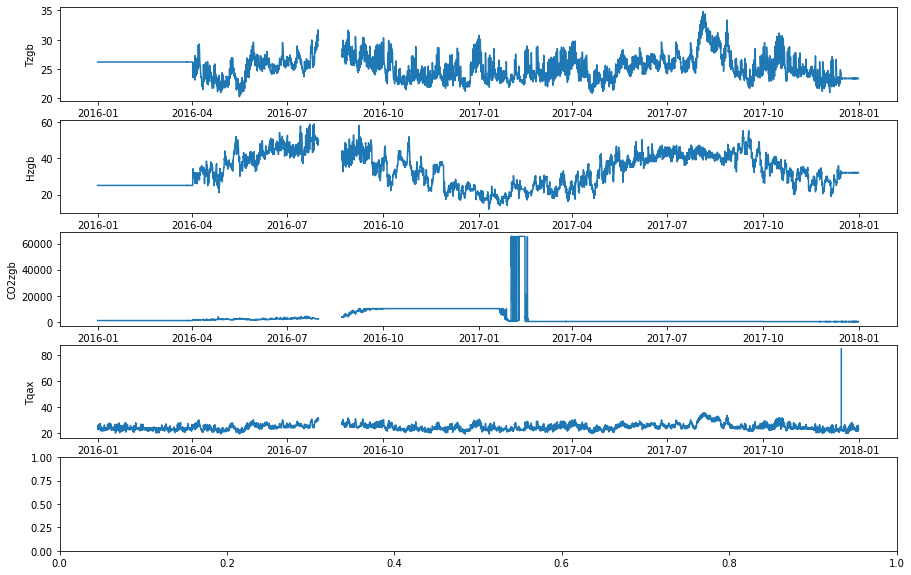

In [8]:
# plotanje svih varijabli našeg Dataframea
fig, ax = plt.subplots(ncols=1, nrows=5, figsize=(15,10))
for i in range(4):
    col = temp.columns[i]
    ax[i].plot(temp.index, temp[col])
    ax[i].set_ylabel(col)

In [9]:
# učitati podatke iz meteo_measurements.csv
meteo_df = pd.read_csv('meteo_measurements.csv', index_col='Measurement_time', parse_dates=True)
meteo_df.head()

,T_avg,T_S,T_N,Wdir,Wspd,Idir,Idiff,P,RH
Measurement_time,,,,,,,,,
2016-01-01 00:00:00,-2.15,-2.1,-2.2,62,1.0,0,0,1004.8,73
2016-01-01 00:05:00,-2.15,-2.1,-2.2,86,0.8,0,0,1004.9,73
2016-01-01 00:10:00,-2.15,-2.1,-2.2,76,0.8,0,0,1004.8,73
2016-01-01 00:15:00,-2.05,-2.1,-2.0,90,0.7,0,0,1004.8,73
2016-01-01 00:20:00,-1.90,-2.1,-1.7,80,0.6,0,0,1004.7,72


In [10]:
# izbacivanje nepotrebnih varijabli te razvrstavanje podataka na svakih 1 h
meteo_df = meteo_df.drop(['T_S', 'T_N', 'Wdir', 'Wspd', 'P'], axis=1)
meteo_df = meteo_df.resample('H').mean()
meteo_df.head()

,T_avg,Idir,Idiff,RH
Measurement_time,,,,
2016-01-01 00:00:00,-1.841667,0.0,0.0,71.333333
2016-01-01 01:00:00,-1.233333,0.0,0.0,68.833333
2016-01-01 02:00:00,-0.775000,0.0,0.0,68.666667
2016-01-01 03:00:00,-1.320833,0.0,0.0,71.833333
2016-01-01 04:00:00,-1.858333,0.0,0.0,75.000000


In [11]:
# promjena naziva indeksa radi f-je merge()
meteo_df.index.names = ['Timestamp']
meteo_df.head()

,T_avg,Idir,Idiff,RH
Timestamp,,,,
2016-01-01 00:00:00,-1.841667,0.0,0.0,71.333333
2016-01-01 01:00:00,-1.233333,0.0,0.0,68.833333
2016-01-01 02:00:00,-0.775000,0.0,0.0,68.666667
2016-01-01 03:00:00,-1.320833,0.0,0.0,71.833333
2016-01-01 04:00:00,-1.858333,0.0,0.0,75.000000


In [12]:
# spajanje dataframeova
meteozone = pd.merge(temp, meteo_df, how='left', on=['Timestamp'])
meteozone.head()

,Tzgb,Hzgb,CO2zgb,Tqax,T_avg,Idir,Idiff,RH
Timestamp,,,,,,,,
2016-01-01 00:00:00,26.2,25.0,810.0,23.850000,-1.841667,0.0,0.0,71.333333
2016-01-01 01:00:00,26.2,25.0,810.0,23.490000,-1.233333,0.0,0.0,68.833333
2016-01-01 02:00:00,26.2,25.0,810.0,23.296452,-0.775000,0.0,0.0,68.666667
2016-01-01 03:00:00,26.2,25.0,810.0,23.045789,-1.320833,0.0,0.0,71.833333
2016-01-01 04:00:00,26.2,25.0,810.0,22.803600,-1.858333,0.0,0.0,75.000000


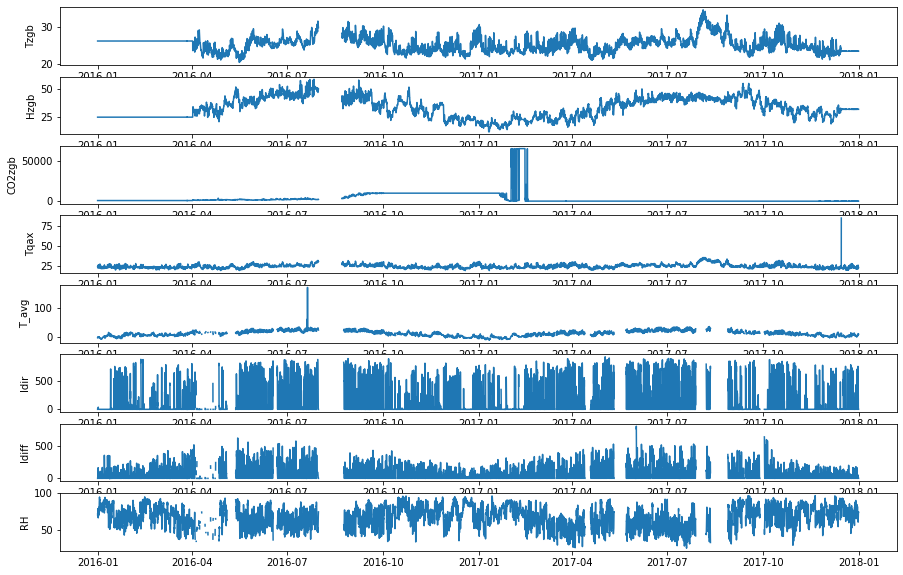

In [13]:
# plotanje spojenih podataka za 6. zonu
fig, ax = plt.subplots(ncols=1, nrows=8, figsize=(15,10))
for i in range(8):
    col = meteozone.columns[i]
    ax[i].plot(meteozone.index, meteozone[col])
    ax[i].set_ylabel(col)

In [14]:
# zamjena neg vrijednosti nulom u Idir i Idiff
cols = ['Idir','Idiff']
meteozone[meteozone[cols] < 0] = 0
meteozone

,Tzgb,Hzgb,CO2zgb,Tqax,T_avg,Idir,Idiff,RH
Timestamp,,,,,,,,
2016-01-01 00:00:00,26.2,25.0,810.0,23.850000,-1.841667,0.0,0.0,71.333333
2016-01-01 01:00:00,26.2,25.0,810.0,23.490000,-1.233333,0.0,0.0,68.833333
2016-01-01 02:00:00,26.2,25.0,810.0,23.296452,-0.775000,0.0,0.0,68.666667
2016-01-01 03:00:00,26.2,25.0,810.0,23.045789,-1.320833,0.0,0.0,71.833333
2016-01-01 04:00:00,26.2,25.0,810.0,22.803600,-1.858333,0.0,0.0,75.000000
...,...,...,...,...,...,...,...,...
2017-12-31 19:00:00,23.4,32.0,0.0,23.520000,8.595833,0.0,0.0,71.333333
2017-12-31 20:00:00,23.4,32.0,0.0,23.280000,8.466667,0.0,0.0,72.833333
2017-12-31 21:00:00,23.4,32.0,0.0,23.100000,8.933333,0.0,0.0,74.500000


In [15]:
# vremenski ograničeni dio - 8 najpovoljnijih mjeseci za set za treniranje
start = np.datetime64('2016-08-25 00:00:00')
end = np.datetime64('2017-04-12 00:00:00')
train_x = meteozone[(meteozone.index>=start) & (meteozone.index<end)].drop(['Tzgb', 'Hzgb', 'CO2zgb', 'Tqax'], axis=1)
train_x

,T_avg,Idir,Idiff,RH
Timestamp,,,,
2016-08-25 00:00:00,21.095833,0.0,0.000000,64.000000
2016-08-25 01:00:00,19.879167,0.0,0.000000,66.583333
2016-08-25 02:00:00,18.658333,0.0,0.000000,72.083333
2016-08-25 03:00:00,18.208333,0.0,0.000000,73.250000
2016-08-25 04:00:00,17.812500,0.0,0.000000,76.750000
...,...,...,...,...
2017-04-11 19:00:00,11.975000,0.0,0.833333,75.333333
2017-04-11 20:00:00,11.679167,0.0,0.000000,74.750000
2017-04-11 21:00:00,11.366667,0.0,0.000000,72.750000


In [16]:
# broj nan vrijednosti u train_x setu
train_x.isna().sum()

T_avg    111
Idir     111
Idiff    111
RH       111
dtype: int64

In [17]:
# popunjavanje rupa interpolacijom
train_x = train_x.interpolate()
train_x.isna().sum()

T_avg    0
Idir     0
Idiff    0
RH       0
dtype: int64

In [18]:
# spremanje train_x varijable
train_x.to_csv('train_x.csv')
train_x

,T_avg,Idir,Idiff,RH
Timestamp,,,,
2016-08-25 00:00:00,21.095833,0.0,0.000000,64.000000
2016-08-25 01:00:00,19.879167,0.0,0.000000,66.583333
2016-08-25 02:00:00,18.658333,0.0,0.000000,72.083333
2016-08-25 03:00:00,18.208333,0.0,0.000000,73.250000
2016-08-25 04:00:00,17.812500,0.0,0.000000,76.750000
...,...,...,...,...
2017-04-11 19:00:00,11.975000,0.0,0.833333,75.333333
2017-04-11 20:00:00,11.679167,0.0,0.000000,74.750000
2017-04-11 21:00:00,11.366667,0.0,0.000000,72.750000


In [19]:
# train_y set te broj nan vrijednosti u train_y setu
train_y = meteozone[(meteozone.index>=start) & (meteozone.index<end)].Hzgb
train_y.isna().sum()

5

In [20]:
# popunjavanje rupa interpolacijom
train_y = train_y.interpolate()
train_y = pd.DataFrame(train_y)
train_y.to_csv('train_y_hzgb.csv')
train_y.isna().sum()

Hzgb    0
dtype: int64

In [21]:
# vremenski ograničeni dio - 2 najpovoljnija mjeseca za set za testiranje
start = np.datetime64('2017-05-23 00:00:00')
end = np.datetime64('2017-07-23 00:00:00')
test_x = meteozone[(meteozone.index>=start) & (meteozone.index<end)].drop(['Tzgb', 'Hzgb', 'CO2zgb', 'Tqax'], axis=1)
test_x

,T_avg,Idir,Idiff,RH
Timestamp,,,,
2017-05-23 00:00:00,19.241667,0.000000,0.000000,61.416667
2017-05-23 01:00:00,18.954167,0.000000,0.000000,62.416667
2017-05-23 02:00:00,18.020833,0.000000,0.000000,68.083333
2017-05-23 03:00:00,17.283333,0.000000,0.000000,68.416667
2017-05-23 04:00:00,16.804167,0.000000,0.000000,68.833333
...,...,...,...,...
2017-07-22 19:00:00,33.975000,327.666667,56.166667,31.916667
2017-07-22 20:00:00,31.965000,43.300000,9.400000,35.500000
2017-07-22 21:00:00,30.250000,0.000000,0.000000,38.250000


In [22]:
# broj nan vrijednosti u test_x setu
test_x.isna().sum()

T_avg    51
Idir     51
Idiff    51
RH       51
dtype: int64

In [23]:
# popunjavanje rupa interpolacijom
test_x = test_x.interpolate()
test_x.to_csv('test_x.csv')
test_x.isna().sum()

T_avg    0
Idir     0
Idiff    0
RH       0
dtype: int64

In [24]:
# test_y set te broj nan vrijednosti u test_y setu
test_y = meteozone[(meteozone.index>=start) & (meteozone.index<end)].Hzgb
test_y.isna().sum()

0

In [25]:
# spremanje podataka 
test_y = pd.DataFrame(test_y)
test_y.to_csv('test_y_hzgb.csv')
test_y

,Hzgb
Timestamp,
2017-05-23 00:00:00,37.576923
2017-05-23 01:00:00,38.000000
2017-05-23 02:00:00,38.736842
2017-05-23 03:00:00,39.000000
2017-05-23 04:00:00,39.000000
...,...
2017-07-22 19:00:00,41.578947
2017-07-22 20:00:00,42.000000
2017-07-22 21:00:00,42.000000


## Predviđanje Hzgb bez shifta

In [26]:
# brisanje prvih 168 redaka tako da u svakom slučaju imamo istu količinu redaka train i test seta
i=168
train_x = train_x.iloc[i:]
test_x = test_x.iloc[i:]
train_y = train_y.iloc[i:]
test_y = test_y.iloc[i:]
train_x

,T_avg,Idir,Idiff,RH
Timestamp,,,,
2016-09-01 00:00:00,20.158333,0.0,0.000000,53.666667
2016-09-01 01:00:00,19.608333,0.0,0.000000,55.083333
2016-09-01 02:00:00,18.708333,0.0,0.000000,59.000000
2016-09-01 03:00:00,18.070833,0.0,0.000000,61.416667
2016-09-01 04:00:00,17.541667,0.0,0.000000,64.083333
...,...,...,...,...
2017-04-11 19:00:00,11.975000,0.0,0.833333,75.333333
2017-04-11 20:00:00,11.679167,0.0,0.000000,74.750000
2017-04-11 21:00:00,11.366667,0.0,0.000000,72.750000


In [27]:
# skaliranje varijabli (bez shifta)
from sklearn.preprocessing import StandardScaler
sclx = StandardScaler()
train_x = pd.DataFrame(sclx.fit_transform(train_x))
train_x.columns = ['T_avg','Idir','Idiff','RH']
test_x = pd.DataFrame(sclx.transform (test_x))
test_x.columns = ['T_avg','Idir','Idiff','RH']
train_x

,T_avg,Idir,Idiff,RH
0,1.446240,-0.489533,-0.623256,-1.009250
1,1.378821,-0.489533,-0.623256,-0.912373
2,1.268500,-0.489533,-0.623256,-0.644536
3,1.190356,-0.489533,-0.623256,-0.479275
4,1.125492,-0.489533,-0.623256,-0.296917
...,...,...,...,...
5347,0.443136,-0.489533,-0.611826,0.472402
5348,0.406874,-0.489533,-0.623256,0.432511
5349,0.368568,-0.489533,-0.623256,0.295743
5350,0.385933,-0.489533,-0.623256,0.084893


In [28]:
# skaliranje varijable za predviđanje
scly = StandardScaler()
train_y_reshaped = pd.DataFrame(scly.fit_transform(train_y.values.reshape(-1, 1)))
train_y_reshaped.columns = ['Hzgb']
test_y_reshaped = pd.DataFrame(scly.transform(test_y.values.reshape(-1, 1)))
test_y_reshaped.columns = ['Hzgb']
test_y_reshaped.head()

,Hzgb
0,1.083322
1,1.083322
2,1.083322
3,1.083322
4,1.099627


In [29]:
# regresija
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X=train_x, y=train_y_reshaped)
y_hat = model.predict(train_x)

In [30]:
# inverzno skaliranje
y_hat_rescaled = scly.inverse_transform(y_hat.reshape(-1, 1))

In [31]:
# metrika
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(train_y, y_hat_rescaled)
print(mse)

14.506717299351811


Text(0, 0.5, 'HZGB')

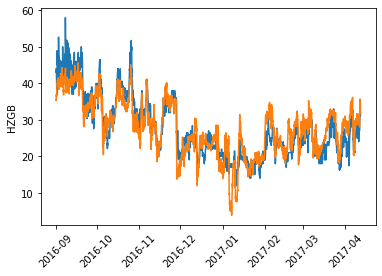

In [32]:
# plotanje radi usporedbe predviđene i dobivene vrijednosti
plt.figure()
plt.plot(train_y)
y_hat_rescaled = pd.DataFrame(y_hat_rescaled)
y_hat_rescaled.index = train_y.index
plt.plot(y_hat_rescaled)
plt.xticks(rotation='45')
plt.ylabel('HZGB')

In [33]:
# regresija na testnom skupu podataka
y_hat = model.predict(test_x)

In [34]:
# inverzno skaliranje
y_hat_rescaled = scly.inverse_transform(y_hat.reshape(-1, 1))

In [35]:
# metrika
mse = mean_squared_error(test_y, y_hat_rescaled)
print(mse)

17.265725107275966


Text(0, 0.5, 'HZGB')

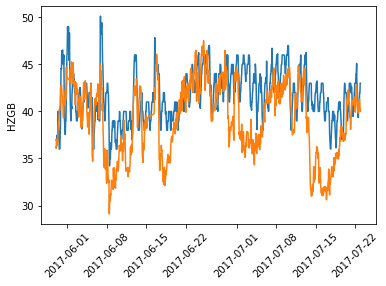

In [36]:
# plotanje radi usporedbe predviđene i dobivene vrijednosti
plt.figure()
plt.plot(test_y)
y_hat_rescaled = pd.DataFrame(y_hat_rescaled)
y_hat_rescaled.index = test_y.index
plt.plot(y_hat_rescaled)
plt.xticks(rotation='45')
plt.ylabel('HZGB')

## Predviđanje Hzgb sa shiftom unazad 2 h

In [37]:
# shift podataka
train_x = pd.read_csv('train_x.csv', index_col='Timestamp', parse_dates=True)
test_x = pd.read_csv('test_x.csv', index_col='Timestamp', parse_dates=True)
train_y = pd.read_csv('train_y_hzgb.csv', index_col='Timestamp', parse_dates=True)
test_y = pd.read_csv('test_y_hzgb.csv', index_col='Timestamp', parse_dates=True)

cols = ['T_avg', 'Idir', 'Idiff', 'RH']
i=1
while i!=3:
   for col in cols:
       train_x[f'{col}{i}'] = train_x[col].shift(i)
       test_x[f'{col}{i}'] = test_x[col].shift(i) 
   i=i+1
test_x.head()

,T_avg,Idir,Idiff,RH,T_avg1,Idir1,Idiff1,RH1,T_avg2,Idir2,Idiff2,RH2
Timestamp,,,,,,,,,,,,
2017-05-23 00:00:00,19.241667,0.0,0.0,61.416667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-23 01:00:00,18.954167,0.0,0.0,62.416667,19.241667,0.0,0.0,61.416667,NaN,NaN,NaN,NaN
2017-05-23 02:00:00,18.020833,0.0,0.0,68.083333,18.954167,0.0,0.0,62.416667,19.241667,0.0,0.0,61.416667
2017-05-23 03:00:00,17.283333,0.0,0.0,68.416667,18.020833,0.0,0.0,68.083333,18.954167,0.0,0.0,62.416667
2017-05-23 04:00:00,16.804167,0.0,0.0,68.833333,17.283333,0.0,0.0,68.416667,18.020833,0.0,0.0,68.083333


In [38]:
# brisanje prvih 168 redaka tako da u svakom slučaju imamo istu količinu redaka train i test seta
i=168
train_x = train_x.iloc[i:]
test_x = test_x.iloc[i:]
train_y = train_y.iloc[i:]
test_y = test_y.iloc[i:]
train_x

,T_avg,Idir,Idiff,RH,T_avg1,Idir1,Idiff1,RH1,T_avg2,Idir2,Idiff2,RH2
Timestamp,,,,,,,,,,,,
2016-09-01 00:00:00,20.158333,0.0,0.000000,53.666667,20.679167,0.0,0.000000,52.166667,21.100000,0.0,0.000000,51.833333
2016-09-01 01:00:00,19.608333,0.0,0.000000,55.083333,20.158333,0.0,0.000000,53.666667,20.679167,0.0,0.000000,52.166667
2016-09-01 02:00:00,18.708333,0.0,0.000000,59.000000,19.608333,0.0,0.000000,55.083333,20.158333,0.0,0.000000,53.666667
2016-09-01 03:00:00,18.070833,0.0,0.000000,61.416667,18.708333,0.0,0.000000,59.000000,19.608333,0.0,0.000000,55.083333
2016-09-01 04:00:00,17.541667,0.0,0.000000,64.083333,18.070833,0.0,0.000000,61.416667,18.708333,0.0,0.000000,59.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-04-11 19:00:00,11.975000,0.0,0.833333,75.333333,12.354167,0.0,17.916667,75.833333,14.408333,0.0,46.666667,65.333333
2017-04-11 20:00:00,11.679167,0.0,0.000000,74.750000,11.975000,0.0,0.833333,75.333333,12.354167,0.0,17.916667,75.833333
2017-04-11 21:00:00,11.366667,0.0,0.000000,72.750000,11.679167,0.0,0.000000,74.750000,11.975000,0.0,0.833333,75.333333


In [39]:
# skaliranje varijabli
train_x = pd.DataFrame(sclx.fit_transform(train_x))
train_x.columns = ['T_avg','Idir','Idiff','RH','T_avg1','Idir1','Idiff1','RH1','T_avg2','Idir2','Idiff2','RH2']
test_x = pd.DataFrame(sclx.transform (test_x))
test_x.columns = ['T_avg','Idir','Idiff','RH','T_avg1','Idir1','Idiff1','RH1','T_avg2','Idir2','Idiff2','RH2']
train_x

,T_avg,Idir,Idiff,RH,T_avg1,Idir1,Idiff1,RH1,T_avg2,Idir2,Idiff2,RH2
0,1.446240,-0.489533,-0.623256,-1.009250,1.509565,-0.489533,-0.623256,-1.111415,1.560587,-0.489533,-0.623256,-1.133844
1,1.378821,-0.489533,-0.623256,-0.912373,1.445735,-0.489533,-0.623256,-1.008847,1.509023,-0.489533,-0.623256,-1.111054
2,1.268500,-0.489533,-0.623256,-0.644536,1.378330,-0.489533,-0.623256,-0.911978,1.445206,-0.489533,-0.623256,-1.008499
3,1.190356,-0.489533,-0.623256,-0.479275,1.268031,-0.489533,-0.623256,-0.644163,1.377816,-0.489533,-0.623256,-0.911641
4,1.125492,-0.489533,-0.623256,-0.296917,1.189903,-0.489533,-0.623256,-0.478915,1.267541,-0.489533,-0.623256,-0.643858
...,...,...,...,...,...,...,...,...,...,...,...,...
5347,0.443136,-0.489533,-0.611826,0.472402,0.489301,-0.489533,-0.377505,0.506873,0.740670,-0.489533,0.016840,-0.210847
5348,0.406874,-0.489533,-0.623256,0.432511,0.442833,-0.489533,-0.611826,0.472684,0.488977,-0.489533,-0.377505,0.507040
5349,0.368568,-0.489533,-0.623256,0.295743,0.406577,-0.489533,-0.623256,0.432796,0.442519,-0.489533,-0.611826,0.472855
5350,0.385933,-0.489533,-0.623256,0.084893,0.368279,-0.489533,-0.623256,0.296040,0.406271,-0.489533,-0.623256,0.432973


In [40]:
# skaliranje varijable za predviđanje
train_y_reshaped = pd.DataFrame(scly.fit_transform(train_y.values.reshape(-1, 1)))
test_y_reshaped = pd.DataFrame(scly.transform(test_y.values.reshape(-1, 1)))
test_y_reshaped.head()

,0
0,1.083322
1,1.083322
2,1.083322
3,1.083322
4,1.099627


In [41]:
# regresija
model.fit(X=train_x, y=train_y_reshaped)
y_hat = model.predict(train_x)

In [42]:
# inverzno skaliranje
y_hat_rescaled = scly.inverse_transform(y_hat.reshape(-1, 1))

In [43]:
# metrika
mse = mean_squared_error(train_y, y_hat_rescaled)
print(mse)

13.71889602824078


Text(0, 0.5, 'HZGB')

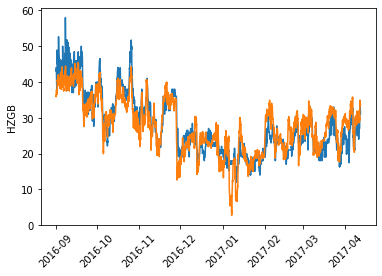

In [44]:
# plotanje radi usporedbe predviđene i dobivene vrijednosti
plt.figure()
plt.plot(train_y)
y_hat_rescaled = pd.DataFrame(y_hat_rescaled)
y_hat_rescaled.index = train_y.index
plt.plot(y_hat_rescaled)
plt.xticks(rotation='45')
plt.ylabel('HZGB')

In [45]:
# regresija na testnom skupu podataka
y_hat = model.predict(test_x)

In [46]:
# inverzno skaliranje
y_hat_rescaled = scly.inverse_transform(y_hat.reshape(-1, 1))

In [47]:
# metrika
mse = mean_squared_error(test_y, y_hat_rescaled)
print(mse)

15.556197422611758


Text(0, 0.5, 'HZGB')

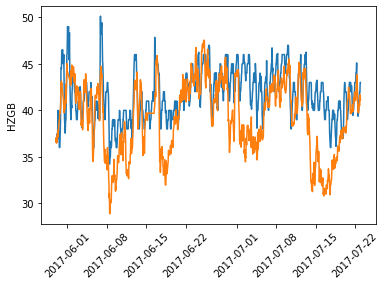

In [48]:
# plotanje radi usporedbe predviđene i dobivene vrijednosti
plt.figure()
plt.plot(test_y)
y_hat_rescaled = pd.DataFrame(y_hat_rescaled)
y_hat_rescaled.index = test_y.index
plt.plot(y_hat_rescaled)
plt.xticks(rotation='45')
plt.ylabel('HZGB')

## Predviđanje Hzgb sa shiftom unazad 5 h

In [49]:
# shift podataka
train_x = pd.read_csv('train_x.csv', index_col='Timestamp', parse_dates=True)
test_x = pd.read_csv('test_x.csv', index_col='Timestamp', parse_dates=True)
train_y = pd.read_csv('train_y_hzgb.csv', index_col='Timestamp', parse_dates=True)
test_y = pd.read_csv('test_y_hzgb.csv', index_col='Timestamp', parse_dates=True)

cols = ['T_avg', 'Idir', 'Idiff', 'RH']
i=1
while i!=6:
   for col in cols:
       train_x[f'{col}{i}'] = train_x[col].shift(i)
       test_x[f'{col}{i}'] = test_x[col].shift(i) 
   i=i+1
test_x.head()

,T_avg,Idir,Idiff,RH,T_avg1,Idir1,Idiff1,RH1,T_avg2,Idir2,...,Idiff3,RH3,T_avg4,Idir4,Idiff4,RH4,T_avg5,Idir5,Idiff5,RH5
Timestamp,,,,,,,,,,,,,,,,,,,,,
2017-05-23 00:00:00,19.241667,0.0,0.0,61.416667,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-23 01:00:00,18.954167,0.0,0.0,62.416667,19.241667,0.0,0.0,61.416667,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-23 02:00:00,18.020833,0.0,0.0,68.083333,18.954167,0.0,0.0,62.416667,19.241667,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-23 03:00:00,17.283333,0.0,0.0,68.416667,18.020833,0.0,0.0,68.083333,18.954167,0.0,...,0.0,61.416667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-23 04:00:00,16.804167,0.0,0.0,68.833333,17.283333,0.0,0.0,68.416667,18.020833,0.0,...,0.0,62.416667,19.241667,0.0,0.0,61.416667,NaN,NaN,NaN,NaN


In [50]:
# brisanje prvih 168 redaka tako da u svakom slučaju imamo istu količinu redaka train i test seta
i=168
train_x = train_x.iloc[i:]
test_x = test_x.iloc[i:]
train_y = train_y.iloc[i:]
test_y = test_y.iloc[i:]
train_x

,T_avg,Idir,Idiff,RH,T_avg1,Idir1,Idiff1,RH1,T_avg2,Idir2,...,Idiff3,RH3,T_avg4,Idir4,Idiff4,RH4,T_avg5,Idir5,Idiff5,RH5
Timestamp,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:00:00,20.158333,0.0,0.000000,53.666667,20.679167,0.0,0.000000,52.166667,21.100000,0.0,...,0.000000,52.583333,23.000000,0.000000,0.000000,49.916667,24.183333,65.000000,8.666667,45.166667
2016-09-01 01:00:00,19.608333,0.0,0.000000,55.083333,20.158333,0.0,0.000000,53.666667,20.679167,0.0,...,0.000000,51.833333,21.787500,0.000000,0.000000,52.583333,23.000000,0.000000,0.000000,49.916667
2016-09-01 02:00:00,18.708333,0.0,0.000000,59.000000,19.608333,0.0,0.000000,55.083333,20.158333,0.0,...,0.000000,52.166667,21.100000,0.000000,0.000000,51.833333,21.787500,0.000000,0.000000,52.583333
2016-09-01 03:00:00,18.070833,0.0,0.000000,61.416667,18.708333,0.0,0.000000,59.000000,19.608333,0.0,...,0.000000,53.666667,20.679167,0.000000,0.000000,52.166667,21.100000,0.000000,0.000000,51.833333
2016-09-01 04:00:00,17.541667,0.0,0.000000,64.083333,18.070833,0.0,0.000000,61.416667,18.708333,0.0,...,0.000000,55.083333,20.158333,0.000000,0.000000,53.666667,20.679167,0.000000,0.000000,52.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-04-11 19:00:00,11.975000,0.0,0.833333,75.333333,12.354167,0.0,17.916667,75.833333,14.408333,0.0,...,217.500000,65.750000,15.375000,29.833333,281.166667,72.250000,15.266667,74.333333,445.333333,73.166667
2017-04-11 20:00:00,11.679167,0.0,0.000000,74.750000,11.975000,0.0,0.833333,75.333333,12.354167,0.0,...,46.666667,65.333333,15.304167,50.583333,217.500000,65.750000,15.375000,29.833333,281.166667,72.250000
2017-04-11 21:00:00,11.366667,0.0,0.000000,72.750000,11.679167,0.0,0.000000,74.750000,11.975000,0.0,...,17.916667,75.833333,14.408333,0.000000,46.666667,65.333333,15.304167,50.583333,217.500000,65.750000


In [51]:
# skaliranje varijabli
train_x = pd.DataFrame(sclx.fit_transform(train_x))
train_x.columns = ['T_avg','Idir','Idiff','RH','T_avg1','Idir1','Idiff1','RH1','T_avg2','Idir2','Idiff2','RH2', 'T_avg3','Idir3','Idiff3','RH3','T_avg4','Idir4','Idiff4','RH4','T_avg5','Idir5','Idiff5','RH5',]
test_x = pd.DataFrame(sclx.transform (test_x))
test_x.columns = ['T_avg','Idir','Idiff','RH','T_avg1','Idir1','Idiff1','RH1','T_avg2','Idir2','Idiff2','RH2', 'T_avg3','Idir3','Idiff3','RH3','T_avg4','Idir4','Idiff4','RH4','T_avg5','Idir5','Idiff5','RH5',]
train_x

,T_avg,Idir,Idiff,RH,T_avg1,Idir1,Idiff1,RH1,T_avg2,Idir2,...,Idiff3,RH3,T_avg4,Idir4,Idiff4,RH4,T_avg5,Idir5,Idiff5,RH5
0,1.446240,-0.489533,-0.623256,-1.009250,1.509565,-0.489533,-0.623256,-1.111415,1.560587,-0.489533,...,-0.623256,-1.082200,1.791952,-0.489533,-0.623256,-1.264018,1.935945,-0.195542,-0.504407,-1.587974
1,1.378821,-0.489533,-0.623256,-0.912373,1.445735,-0.489533,-0.623256,-1.008847,1.509023,-0.489533,...,-0.623256,-1.133472,1.643464,-0.489533,-0.623256,-1.081740,1.791077,-0.489597,-0.623283,-1.263361
2,1.268500,-0.489533,-0.623256,-0.644536,1.378330,-0.489533,-0.623256,-0.911978,1.445206,-0.489533,...,-0.623256,-1.110684,1.559271,-0.489533,-0.623256,-1.133005,1.642639,-0.489597,-0.623283,-1.081122
3,1.190356,-0.489533,-0.623256,-0.479275,1.268031,-0.489533,-0.623256,-0.644163,1.377816,-0.489533,...,-0.623256,-1.008139,1.507734,-0.489533,-0.623256,-1.110221,1.558474,-0.489597,-0.623283,-1.132377
4,1.125492,-0.489533,-0.623256,-0.296917,1.189903,-0.489533,-0.623256,-0.478915,1.267541,-0.489533,...,-0.623256,-0.911291,1.443951,-0.489533,-0.623256,-1.007689,1.506954,-0.489597,-0.623283,-1.109597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5347,0.443136,-0.489533,-0.611826,0.472402,0.489301,-0.489533,-0.377505,0.506873,0.740670,-0.489533,...,2.360047,-0.182083,0.858166,-0.354571,3.233320,0.262561,0.844339,-0.153318,5.485127,0.325534
5348,0.406874,-0.489533,-0.623256,0.432511,0.442833,-0.489533,-0.611826,0.472684,0.488977,-0.489533,...,0.016840,-0.210568,0.849491,-0.260702,2.360047,-0.181742,0.857602,-0.354633,3.233336,0.262890
5349,0.368568,-0.489533,-0.623256,0.295743,0.406577,-0.489533,-0.623256,0.432796,0.442519,-0.489533,...,-0.377505,0.507247,0.739784,-0.489533,0.016840,-0.210223,0.848930,-0.260762,2.360053,-0.181318
5350,0.385933,-0.489533,-0.623256,0.084893,0.368279,-0.489533,-0.623256,0.296040,0.406271,-0.489533,...,-0.611826,0.473065,0.488223,-0.489533,-0.377505,0.507497,0.739259,-0.489597,0.016820,-0.209793


In [52]:
# skaliranje varijable za predviđanje
train_y_reshaped = pd.DataFrame(scly.fit_transform(train_y.values.reshape(-1, 1)))
test_y_reshaped = pd.DataFrame(scly.transform(test_y.values.reshape(-1, 1)))
test_y_reshaped.head()

,0
0,1.083322
1,1.083322
2,1.083322
3,1.083322
4,1.099627


In [53]:
# regresija
model.fit(X=train_x, y=train_y_reshaped)
y_hat = model.predict(train_x)

In [54]:
# inverzno skaliranje
y_hat_rescaled = scly.inverse_transform(y_hat.reshape(-1, 1))

In [55]:
# metrika
mse = mean_squared_error(train_y, y_hat_rescaled)
print(mse)

13.109549965848935


Text(0, 0.5, 'HZGB')

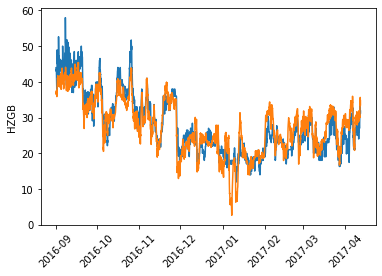

In [56]:
# plotanje radi usporedbe predviđene i dobivene vrijednosti
plt.figure()
plt.plot(train_y)
y_hat_rescaled = pd.DataFrame(y_hat_rescaled)
y_hat_rescaled.index = train_y.index
plt.plot(y_hat_rescaled)
plt.xticks(rotation='45')
plt.ylabel('HZGB')

In [57]:
# regresija na testnom skupu podataka
y_hat = model.predict(test_x)

In [58]:
# inverzno skaliranje
y_hat_rescaled = scly.inverse_transform(y_hat.reshape(-1, 1))

In [59]:
# metrika
mse = mean_squared_error(test_y, y_hat_rescaled)
print(mse)

14.814267475882543


Text(0, 0.5, 'HZGB')

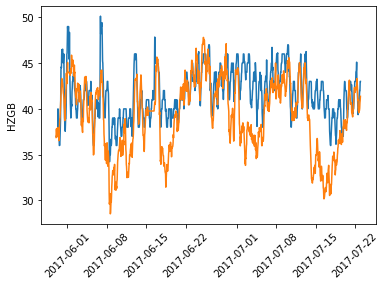

In [60]:
# plotanje radi usporedbe predviđene i dobivene vrijednosti
plt.figure()
plt.plot(test_y)
y_hat_rescaled = pd.DataFrame(y_hat_rescaled)
y_hat_rescaled.index = test_y.index
plt.plot(y_hat_rescaled)
plt.xticks(rotation='45')
plt.ylabel('HZGB')

## Predviđanje Hzgb sa shiftom unazad 2 h (uključeno i mjerenje od prethodnog dana)

In [61]:
# shift podataka
train_x = pd.read_csv('train_x.csv', index_col='Timestamp', parse_dates=True)
test_x = pd.read_csv('test_x.csv', index_col='Timestamp', parse_dates=True)
train_y = pd.read_csv('train_y_hzgb.csv', index_col='Timestamp', parse_dates=True)
test_y = pd.read_csv('test_y_hzgb.csv', index_col='Timestamp', parse_dates=True)

cols = ['T_avg', 'Idir', 'Idiff', 'RH']
i=1
while i!=3:
   for col in cols:
       train_x[f'{col}{i}'] = train_x[col].shift(i)
       test_x[f'{col}{i}'] = test_x[col].shift(i) 
   i=i+1
for col in cols:
   train_x[f'{col}{24}'] = train_x[col].shift(24)
   test_x[f'{col}{24}'] = test_x[col].shift(24) 

test_x.head()

,T_avg,Idir,Idiff,RH,T_avg1,Idir1,Idiff1,RH1,T_avg2,Idir2,Idiff2,RH2,T_avg24,Idir24,Idiff24,RH24
Timestamp,,,,,,,,,,,,,,,,
2017-05-23 00:00:00,19.241667,0.0,0.0,61.416667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-23 01:00:00,18.954167,0.0,0.0,62.416667,19.241667,0.0,0.0,61.416667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-23 02:00:00,18.020833,0.0,0.0,68.083333,18.954167,0.0,0.0,62.416667,19.241667,0.0,0.0,61.416667,NaN,NaN,NaN,NaN
2017-05-23 03:00:00,17.283333,0.0,0.0,68.416667,18.020833,0.0,0.0,68.083333,18.954167,0.0,0.0,62.416667,NaN,NaN,NaN,NaN
2017-05-23 04:00:00,16.804167,0.0,0.0,68.833333,17.283333,0.0,0.0,68.416667,18.020833,0.0,0.0,68.083333,NaN,NaN,NaN,NaN


In [62]:
# brisanje prvih 168 redaka tako da u svakom slučaju imamo istu količinu redaka train i test seta
i=168
train_x = train_x.iloc[i:]
test_x = test_x.iloc[i:]
train_y = train_y.iloc[i:]
test_y = test_y.iloc[i:]
train_x

,T_avg,Idir,Idiff,RH,T_avg1,Idir1,Idiff1,RH1,T_avg2,Idir2,Idiff2,RH2,T_avg24,Idir24,Idiff24,RH24
Timestamp,,,,,,,,,,,,,,,,
2016-09-01 00:00:00,20.158333,0.0,0.000000,53.666667,20.679167,0.0,0.000000,52.166667,21.100000,0.0,0.000000,51.833333,22.504167,0.000000,0.000000,50.000000
2016-09-01 01:00:00,19.608333,0.0,0.000000,55.083333,20.158333,0.0,0.000000,53.666667,20.679167,0.0,0.000000,52.166667,22.066667,0.000000,0.000000,50.833333
2016-09-01 02:00:00,18.708333,0.0,0.000000,59.000000,19.608333,0.0,0.000000,55.083333,20.158333,0.0,0.000000,53.666667,21.720833,0.000000,0.000000,51.166667
2016-09-01 03:00:00,18.070833,0.0,0.000000,61.416667,18.708333,0.0,0.000000,59.000000,19.608333,0.0,0.000000,55.083333,21.212500,0.000000,0.000000,51.416667
2016-09-01 04:00:00,17.541667,0.0,0.000000,64.083333,18.070833,0.0,0.000000,61.416667,18.708333,0.0,0.000000,59.000000,20.495833,0.000000,0.000000,54.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-04-11 19:00:00,11.975000,0.0,0.833333,75.333333,12.354167,0.0,17.916667,75.833333,14.408333,0.0,46.666667,65.333333,23.037500,26.833333,4.833333,31.416667
2017-04-11 20:00:00,11.679167,0.0,0.000000,74.750000,11.975000,0.0,0.833333,75.333333,12.354167,0.0,17.916667,75.833333,20.695833,0.000000,0.000000,37.250000
2017-04-11 21:00:00,11.366667,0.0,0.000000,72.750000,11.679167,0.0,0.000000,74.750000,11.975000,0.0,0.833333,75.333333,20.175000,0.000000,0.000000,39.666667


In [63]:
# skaliranje varijabli
train_x = pd.DataFrame(sclx.fit_transform(train_x))
train_x.columns = ['T_avg','Idir','Idiff','RH','T_avg1','Idir1','Idiff1','RH1','T_avg2','Idir2','Idiff2','RH2', 'T_avg24','Idir24','Idiff24','RH24']
test_x = pd.DataFrame(sclx.transform (test_x))
test_x.columns = ['T_avg','Idir','Idiff','RH','T_avg1','Idir1','Idiff1','RH1','T_avg2','Idir2','Idiff2','RH2', 'T_avg24','Idir24','Idiff24','RH24']
train_x

,T_avg,Idir,Idiff,RH,T_avg1,Idir1,Idiff1,RH1,T_avg2,Idir2,Idiff2,RH2,T_avg24,Idir24,Idiff24,RH24
0,1.446240,-0.489533,-0.623256,-1.009250,1.509565,-0.489533,-0.623256,-1.111415,1.560587,-0.489533,-0.623256,-1.133844,1.720264,-0.491971,-0.625073,-1.255005
1,1.378821,-0.489533,-0.623256,-0.912373,1.445735,-0.489533,-0.623256,-1.008847,1.509023,-0.489533,-0.623256,-1.111054,1.666925,-0.491971,-0.625073,-1.198116
2,1.268500,-0.489533,-0.623256,-0.644536,1.378330,-0.489533,-0.623256,-0.911978,1.445206,-0.489533,-0.623256,-1.008499,1.624762,-0.491971,-0.625073,-1.175361
3,1.190356,-0.489533,-0.623256,-0.479275,1.268031,-0.489533,-0.623256,-0.644163,1.377816,-0.489533,-0.623256,-0.911641,1.562788,-0.491971,-0.625073,-1.158294
4,1.125492,-0.489533,-0.623256,-0.296917,1.189903,-0.489533,-0.623256,-0.478915,1.267541,-0.489533,-0.623256,-0.643858,1.475414,-0.491971,-0.625073,-0.981938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5347,0.443136,-0.489533,-0.611826,0.472402,0.489301,-0.489533,-0.377505,0.506873,0.740670,-0.489533,0.016840,-0.210847,1.785286,-0.371521,-0.558156,-2.523632
5348,0.406874,-0.489533,-0.623256,0.432511,0.442833,-0.489533,-0.611826,0.472684,0.488977,-0.489533,-0.377505,0.507040,1.499797,-0.491971,-0.625073,-2.125408
5349,0.368568,-0.489533,-0.623256,0.295743,0.406577,-0.489533,-0.623256,0.432796,0.442519,-0.489533,-0.611826,0.472855,1.436299,-0.491971,-0.625073,-1.960430
5350,0.385933,-0.489533,-0.623256,0.084893,0.368279,-0.489533,-0.623256,0.296040,0.406271,-0.489533,-0.623256,0.432973,1.374324,-0.491971,-0.625073,-1.789763


In [64]:
# skaliranje varijable za predviđanje
train_y_reshaped = pd.DataFrame(scly.fit_transform(train_y.values.reshape(-1, 1)))
test_y_reshaped = pd.DataFrame(scly.transform(test_y.values.reshape(-1, 1)))
test_y_reshaped.head()

,0
0,1.083322
1,1.083322
2,1.083322
3,1.083322
4,1.099627


In [65]:
# regresija
model.fit(X=train_x, y=train_y_reshaped)
y_hat = model.predict(train_x)

In [66]:
# inverzno skaliranje
y_hat_rescaled = scly.inverse_transform(y_hat.reshape(-1, 1))

In [67]:
# metrika
mse = mean_squared_error(train_y, y_hat_rescaled)
print(mse)

11.343551167933999


Text(0, 0.5, 'HZGB')

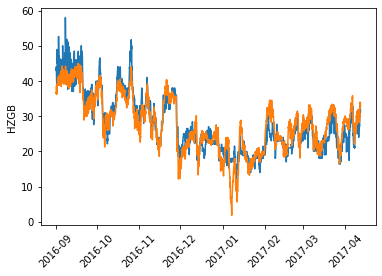

In [68]:
# plotanje radi usporedbe predviđene i dobivene vrijednosti
plt.figure()
plt.plot(train_y)
y_hat_rescaled = pd.DataFrame(y_hat_rescaled)
y_hat_rescaled.index = train_y.index
plt.plot(y_hat_rescaled)
plt.xticks(rotation='45')
plt.ylabel('HZGB')

In [69]:
# regresija na testnom skupu podataka
y_hat = model.predict(test_x)

In [70]:
# inverzno skaliranje
y_hat_rescaled = scly.inverse_transform(y_hat.reshape(-1, 1))

In [71]:
# metrika
mse = mean_squared_error(test_y, y_hat_rescaled)
print(mse)

13.545519509122869


Text(0, 0.5, 'HZGB')

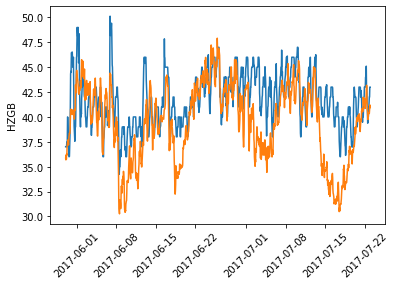

In [72]:
# plotanje radi usporedbe predviđene i dobivene vrijednosti
plt.figure()
plt.plot(test_y)
y_hat_rescaled = pd.DataFrame(y_hat_rescaled)
y_hat_rescaled.index = test_y.index
plt.plot(y_hat_rescaled)
plt.xticks(rotation='45')
plt.ylabel('HZGB')

## Predviđanje Hzgb sa shiftom unazad 2 h 
### (uključeno i mjerenje od prethodnog dana te od prethodnog tjedna)

In [73]:
# shift podataka
train_x = pd.read_csv('train_x.csv', index_col='Timestamp', parse_dates=True)
test_x = pd.read_csv('test_x.csv', index_col='Timestamp', parse_dates=True)
train_y = pd.read_csv('train_y_hzgb.csv', index_col='Timestamp', parse_dates=True)
test_y = pd.read_csv('test_y_hzgb.csv', index_col='Timestamp', parse_dates=True)

cols = ['T_avg', 'Idir', 'Idiff', 'RH']
i=1
while i!=3:
   for col in cols:
       train_x[f'{col}{i}'] = train_x[col].shift(i)
       test_x[f'{col}{i}'] = test_x[col].shift(i) 
   i=i+1
for col in cols:
   train_x[f'{col}{24}'] = train_x[col].shift(24)
   test_x[f'{col}{24}'] = test_x[col].shift(24) 

for col in cols:
   train_x[f'{col}{168}'] = train_x[col].shift(168)
   test_x[f'{col}{168}'] = test_x[col].shift(168)
    
test_x.head()

,T_avg,Idir,Idiff,RH,T_avg1,Idir1,Idiff1,RH1,T_avg2,Idir2,Idiff2,RH2,T_avg24,Idir24,Idiff24,RH24,T_avg168,Idir168,Idiff168,RH168
Timestamp,,,,,,,,,,,,,,,,,,,,
2017-05-23 00:00:00,19.241667,0.0,0.0,61.416667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-23 01:00:00,18.954167,0.0,0.0,62.416667,19.241667,0.0,0.0,61.416667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-23 02:00:00,18.020833,0.0,0.0,68.083333,18.954167,0.0,0.0,62.416667,19.241667,0.0,0.0,61.416667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-23 03:00:00,17.283333,0.0,0.0,68.416667,18.020833,0.0,0.0,68.083333,18.954167,0.0,0.0,62.416667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-23 04:00:00,16.804167,0.0,0.0,68.833333,17.283333,0.0,0.0,68.416667,18.020833,0.0,0.0,68.083333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
# brisanje prvih 168 redaka zbog Nan vrijednosti
i=168
train_x = train_x.iloc[i:]
test_x = test_x.iloc[i:]
train_y = train_y.iloc[i:]
test_y = test_y.iloc[i:]
train_x

,T_avg,Idir,Idiff,RH,T_avg1,Idir1,Idiff1,RH1,T_avg2,Idir2,Idiff2,RH2,T_avg24,Idir24,Idiff24,RH24,T_avg168,Idir168,Idiff168,RH168
Timestamp,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:00:00,20.158333,0.0,0.000000,53.666667,20.679167,0.0,0.000000,52.166667,21.100000,0.0,0.000000,51.833333,22.504167,0.000000,0.000000,50.000000,21.095833,0.0,0.000000,64.000000
2016-09-01 01:00:00,19.608333,0.0,0.000000,55.083333,20.158333,0.0,0.000000,53.666667,20.679167,0.0,0.000000,52.166667,22.066667,0.000000,0.000000,50.833333,19.879167,0.0,0.000000,66.583333
2016-09-01 02:00:00,18.708333,0.0,0.000000,59.000000,19.608333,0.0,0.000000,55.083333,20.158333,0.0,0.000000,53.666667,21.720833,0.000000,0.000000,51.166667,18.658333,0.0,0.000000,72.083333
2016-09-01 03:00:00,18.070833,0.0,0.000000,61.416667,18.708333,0.0,0.000000,59.000000,19.608333,0.0,0.000000,55.083333,21.212500,0.000000,0.000000,51.416667,18.208333,0.0,0.000000,73.250000
2016-09-01 04:00:00,17.541667,0.0,0.000000,64.083333,18.070833,0.0,0.000000,61.416667,18.708333,0.0,0.000000,59.000000,20.495833,0.000000,0.000000,54.000000,17.812500,0.0,0.000000,76.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-04-11 19:00:00,11.975000,0.0,0.833333,75.333333,12.354167,0.0,17.916667,75.833333,14.408333,0.0,46.666667,65.333333,23.037500,26.833333,4.833333,31.416667,16.637500,0.0,0.833333,59.166667
2017-04-11 20:00:00,11.679167,0.0,0.000000,74.750000,11.975000,0.0,0.833333,75.333333,12.354167,0.0,17.916667,75.833333,20.695833,0.000000,0.000000,37.250000,15.945833,0.0,0.000000,57.833333
2017-04-11 21:00:00,11.366667,0.0,0.000000,72.750000,11.679167,0.0,0.000000,74.750000,11.975000,0.0,0.833333,75.333333,20.175000,0.000000,0.000000,39.666667,16.200000,0.0,0.000000,55.500000


In [75]:
# skaliranje varijabli
train_x = pd.DataFrame(sclx.fit_transform(train_x))
train_x.columns = ['T_avg','Idir','Idiff','RH','T_avg1','Idir1','Idiff1','RH1','T_avg2','Idir2','Idiff2','RH2', 'T_avg24','Idir24','Idiff24','RH24', 'T_avg168','Idir168','Idiff168','RH168']
test_x = pd.DataFrame(sclx.transform (test_x))
test_x.columns = ['T_avg','Idir','Idiff','RH','T_avg1','Idir1','Idiff1','RH1','T_avg2','Idir2','Idiff2','RH2', 'T_avg24','Idir24','Idiff24','RH24', 'T_avg168','Idir168','Idiff168','RH168']
train_x

,T_avg,Idir,Idiff,RH,T_avg1,Idir1,Idiff1,RH1,T_avg2,Idir2,Idiff2,RH2,T_avg24,Idir24,Idiff24,RH24,T_avg168,Idir168,Idiff168,RH168
0,1.446240,-0.489533,-0.623256,-1.009250,1.509565,-0.489533,-0.623256,-1.111415,1.560587,-0.489533,-0.623256,-1.133844,1.720264,-0.491971,-0.625073,-1.255005,1.462681,-0.499109,-0.629720,-0.307453
1,1.378821,-0.489533,-0.623256,-0.912373,1.445735,-0.489533,-0.623256,-1.008847,1.509023,-0.489533,-0.623256,-1.111054,1.666925,-0.491971,-0.625073,-1.198116,1.319747,-0.499109,-0.629720,-0.129690
2,1.268500,-0.489533,-0.623256,-0.644536,1.378330,-0.489533,-0.623256,-0.911978,1.445206,-0.489533,-0.623256,-1.008499,1.624762,-0.491971,-0.625073,-1.175361,1.176323,-0.499109,-0.629720,0.248773
3,1.190356,-0.489533,-0.623256,-0.479275,1.268031,-0.489533,-0.623256,-0.644163,1.377816,-0.489533,-0.623256,-0.911641,1.562788,-0.491971,-0.625073,-1.158294,1.123457,-0.499109,-0.629720,0.329053
4,1.125492,-0.489533,-0.623256,-0.296917,1.189903,-0.489533,-0.623256,-0.478915,1.267541,-0.489533,-0.623256,-0.643858,1.475414,-0.491971,-0.625073,-0.981938,1.076955,-0.499109,-0.629720,0.569893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5347,0.443136,-0.489533,-0.611826,0.472402,0.489301,-0.489533,-0.377505,0.506873,0.740670,-0.489533,0.016840,-0.210847,1.785286,-0.371521,-0.558156,-2.523632,0.938916,-0.499109,-0.617967,-0.640042
5348,0.406874,-0.489533,-0.623256,0.432511,0.442833,-0.489533,-0.611826,0.472684,0.488977,-0.489533,-0.377505,0.507040,1.499797,-0.491971,-0.625073,-2.125408,0.857659,-0.499109,-0.629720,-0.731791
5349,0.368568,-0.489533,-0.623256,0.295743,0.406577,-0.489533,-0.623256,0.432796,0.442519,-0.489533,-0.611826,0.472855,1.436299,-0.491971,-0.625073,-1.960430,0.887518,-0.499109,-0.629720,-0.892351
5350,0.385933,-0.489533,-0.623256,0.084893,0.368279,-0.489533,-0.623256,0.296040,0.406271,-0.489533,-0.623256,0.432973,1.374324,-0.491971,-0.625073,-1.789763,0.727941,-0.499109,-0.629720,-0.427873


In [76]:
# skaliranje varijable za predviđanje
train_y_reshaped = pd.DataFrame(scly.fit_transform(train_y.values.reshape(-1, 1)))
test_y_reshaped = pd.DataFrame(scly.transform(test_y.values.reshape(-1, 1)))
test_y_reshaped.head()

,0
0,1.083322
1,1.083322
2,1.083322
3,1.083322
4,1.099627


In [77]:
# regresija
model.fit(X=train_x, y=train_y_reshaped)
y_hat = model.predict(train_x)

In [78]:
# inverzno skaliranje
y_hat_rescaled = scly.inverse_transform(y_hat.reshape(-1, 1))

In [79]:
# metrika
mse = mean_squared_error(train_y, y_hat_rescaled)
print(mse)

8.618484084432373


Text(0, 0.5, 'HZGB')

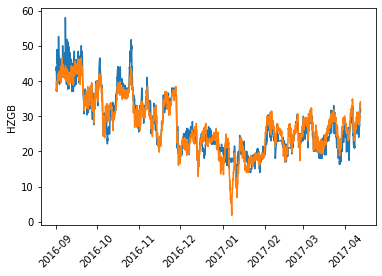

In [80]:
# plotanje radi usporedbe predviđene i dobivene vrijednosti
plt.figure()
plt.plot(train_y)
y_hat_rescaled = pd.DataFrame(y_hat_rescaled)
y_hat_rescaled.index = train_y.index
plt.plot(y_hat_rescaled)
plt.xticks(rotation='45')
plt.ylabel('HZGB')

In [81]:
# regresija na testnom skupu podataka
y_hat = model.predict(test_x)

In [82]:
# inverzno skaliranje
y_hat_rescaled = scly.inverse_transform(y_hat.reshape(-1, 1))

In [83]:
# metrika
mse = mean_squared_error(test_y, y_hat_rescaled)
print(mse)

7.927223678049628


Text(0, 0.5, 'HZGB')

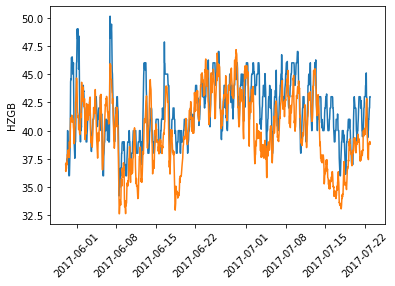

In [84]:
# plotanje radi usporedbe predviđene i dobivene vrijednosti
plt.figure()
plt.plot(test_y)
y_hat_rescaled = pd.DataFrame(y_hat_rescaled)
y_hat_rescaled.index = test_y.index
plt.plot(y_hat_rescaled)
plt.xticks(rotation='45')
plt.ylabel('HZGB')

## Predviđanje Hzgb 24 h unaprijed

In [85]:
# izvlačenje podataka potrebnih za predviđanje
train_x = pd.read_csv('train_x.csv', index_col='Timestamp', parse_dates=True)
train_y = pd.read_csv('train_y_hzgb.csv', index_col='Timestamp', parse_dates=True)
test_x = pd.read_csv('test_x.csv', index_col='Timestamp', parse_dates=True)
test_y = pd.read_csv('test_y_hzgb.csv', index_col='Timestamp', parse_dates=True)
train_x = pd.merge(train_x, train_y, how='left', on=['Timestamp'])
test_x = pd.merge(test_x, test_y, how='left', on=['Timestamp'])
train_x

,T_avg,Idir,Idiff,RH,Hzgb
Timestamp,,,,,
2016-08-25 00:00:00,21.095833,0.0,0.000000,64.000000,42.000000
2016-08-25 01:00:00,19.879167,0.0,0.000000,66.583333,42.923077
2016-08-25 02:00:00,18.658333,0.0,0.000000,72.083333,43.000000
2016-08-25 03:00:00,18.208333,0.0,0.000000,73.250000,43.000000
2016-08-25 04:00:00,17.812500,0.0,0.000000,76.750000,43.783784
...,...,...,...,...,...
2017-04-11 19:00:00,11.975000,0.0,0.833333,75.333333,32.080000
2017-04-11 20:00:00,11.679167,0.0,0.000000,74.750000,32.000000
2017-04-11 21:00:00,11.366667,0.0,0.000000,72.750000,32.000000


In [86]:
# shift podataka
cols = ['T_avg', 'Idir', 'Idiff', 'RH', 'Hzgb']
i=1
while i!=3:
    for col in cols:
        train_x[f'{col}{i}'] = train_x[col].shift(i)
        test_x[f'{col}{i}'] = test_x[col].shift(i) 
    i=i+1
for col in cols:
    train_x[f'{col}{24}'] = train_x[col].shift(24)
    test_x[f'{col}{24}'] = test_x[col].shift(24) 

for col in cols:
    train_x[f'{col}{168}'] = train_x[col].shift(168)
    test_x[f'{col}{168}'] = test_x[col].shift(168)
    
train_x = train_x.drop(['Hzgb'], axis=1)  
test_x = test_x.drop(['Hzgb'], axis=1) 
test_x.head()

,T_avg,Idir,Idiff,RH,T_avg1,Idir1,Idiff1,RH1,Hzgb1,T_avg2,...,T_avg24,Idir24,Idiff24,RH24,Hzgb24,T_avg168,Idir168,Idiff168,RH168,Hzgb168
Timestamp,,,,,,,,,,,,,,,,,,,,,
2017-05-23 00:00:00,19.241667,0.0,0.0,61.416667,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-23 01:00:00,18.954167,0.0,0.0,62.416667,19.241667,0.0,0.0,61.416667,37.576923,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-23 02:00:00,18.020833,0.0,0.0,68.083333,18.954167,0.0,0.0,62.416667,38.000000,19.241667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-23 03:00:00,17.283333,0.0,0.0,68.416667,18.020833,0.0,0.0,68.083333,38.736842,18.954167,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-23 04:00:00,16.804167,0.0,0.0,68.833333,17.283333,0.0,0.0,68.416667,39.000000,18.020833,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
# brisanje prvih 168 redaka zbog Nan vrijednosti
i=168
train_x = train_x.iloc[i:]
test_x = test_x.iloc[i:]
train_y = train_y.iloc[i:]
test_y = test_y.iloc[i:]
train_x.to_csv('24h_hzgb.csv')
train_x

,T_avg,Idir,Idiff,RH,T_avg1,Idir1,Idiff1,RH1,Hzgb1,T_avg2,...,T_avg24,Idir24,Idiff24,RH24,Hzgb24,T_avg168,Idir168,Idiff168,RH168,Hzgb168
Timestamp,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:00:00,20.158333,0.0,0.000000,53.666667,20.679167,0.0,0.000000,52.166667,44.000000,21.100000,...,22.504167,0.000000,0.000000,50.000000,42.000000,21.095833,0.0,0.000000,64.000000,42.000000
2016-09-01 01:00:00,19.608333,0.0,0.000000,55.083333,20.158333,0.0,0.000000,53.666667,43.965517,20.679167,...,22.066667,0.000000,0.000000,50.833333,41.321429,19.879167,0.0,0.000000,66.583333,42.923077
2016-09-01 02:00:00,18.708333,0.0,0.000000,59.000000,19.608333,0.0,0.000000,55.083333,43.000000,20.158333,...,21.720833,0.000000,0.000000,51.166667,41.000000,18.658333,0.0,0.000000,72.083333,43.000000
2016-09-01 03:00:00,18.070833,0.0,0.000000,61.416667,18.708333,0.0,0.000000,59.000000,43.000000,19.608333,...,21.212500,0.000000,0.000000,51.416667,41.000000,18.208333,0.0,0.000000,73.250000,43.000000
2016-09-01 04:00:00,17.541667,0.0,0.000000,64.083333,18.070833,0.0,0.000000,61.416667,43.000000,18.708333,...,20.495833,0.000000,0.000000,54.000000,41.000000,17.812500,0.0,0.000000,76.750000,43.783784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-04-11 19:00:00,11.975000,0.0,0.833333,75.333333,12.354167,0.0,17.916667,75.833333,32.433333,14.408333,...,23.037500,26.833333,4.833333,31.416667,26.421053,16.637500,0.0,0.833333,59.166667,30.035714
2017-04-11 20:00:00,11.679167,0.0,0.000000,74.750000,11.975000,0.0,0.833333,75.333333,32.080000,12.354167,...,20.695833,0.000000,0.000000,37.250000,26.607143,15.945833,0.0,0.000000,57.833333,30.640000
2017-04-11 21:00:00,11.366667,0.0,0.000000,72.750000,11.679167,0.0,0.000000,74.750000,32.000000,11.975000,...,20.175000,0.000000,0.000000,39.666667,26.000000,16.200000,0.0,0.000000,55.500000,29.000000


In [88]:
# skaliranje varijabli
train_x = pd.DataFrame(sclx.fit_transform(train_x))
train_x.columns = ['T_avg','Idir','Idiff','RH','T_avg1','Idir1','Idiff1','RH1', 'Hzgb1','T_avg2','Idir2','Idiff2','RH2', 'Hzgb2','T_avg24','Idir24','Idiff24','RH24','Hzgb24', 'T_avg168','Idir168','Idiff168','RH168','Hzgb168']
test_x = pd.DataFrame(sclx.transform (test_x))
test_x.columns = ['T_avg','Idir','Idiff','RH','T_avg1','Idir1','Idiff1','RH1','Hzgb1','T_avg2','Idir2','Idiff2','RH2','Hzgb2', 'T_avg24','Idir24','Idiff24','RH24','Hzgb24', 'T_avg168','Idir168','Idiff168','RH168','Hzgb168']
train_x

,T_avg,Idir,Idiff,RH,T_avg1,Idir1,Idiff1,RH1,Hzgb1,T_avg2,...,T_avg24,Idir24,Idiff24,RH24,Hzgb24,T_avg168,Idir168,Idiff168,RH168,Hzgb168
0,1.446240,-0.489533,-0.623256,-1.009250,1.509565,-0.489533,-0.623256,-1.111415,1.909899,1.560587,...,1.720264,-0.491971,-0.625073,-1.255005,1.660331,1.462681,-0.499109,-0.629720,-0.307453,1.558956
1,1.378821,-0.489533,-0.623256,-0.912373,1.445735,-0.489533,-0.623256,-1.008847,1.905824,1.509023,...,1.666925,-0.491971,-0.625073,-1.198116,1.580518,1.319747,-0.499109,-0.629720,-0.129690,1.663900
2,1.268500,-0.489533,-0.623256,-0.644536,1.378330,-0.489533,-0.623256,-0.911978,1.791728,1.445206,...,1.624762,-0.491971,-0.625073,-1.175361,1.542712,1.176323,-0.499109,-0.629720,0.248773,1.672645
3,1.190356,-0.489533,-0.623256,-0.479275,1.268031,-0.489533,-0.623256,-0.644163,1.791728,1.377816,...,1.562788,-0.491971,-0.625073,-1.158294,1.542712,1.123457,-0.499109,-0.629720,0.329053,1.672645
4,1.125492,-0.489533,-0.623256,-0.296917,1.189903,-0.489533,-0.623256,-0.478915,1.791728,1.267541,...,1.475414,-0.491971,-0.625073,-0.981938,1.542712,1.076955,-0.499109,-0.629720,0.569893,1.761752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5347,0.443136,-0.489533,-0.611826,0.472402,0.489301,-0.489533,-0.377505,0.506873,0.543064,0.740670,...,1.785286,-0.371521,-0.558156,-2.523632,-0.172048,0.938916,-0.499109,-0.617967,-0.640042,0.198755
5348,0.406874,-0.489533,-0.623256,0.432511,0.442833,-0.489533,-0.611826,0.472684,0.501310,0.488977,...,1.499797,-0.491971,-0.625073,-2.125408,-0.150160,0.857659,-0.499109,-0.629720,-0.731791,0.267455
5349,0.368568,-0.489533,-0.623256,0.295743,0.406577,-0.489533,-0.623256,0.432796,0.491857,0.442519,...,1.436299,-0.491971,-0.625073,-1.960430,-0.221572,0.887518,-0.499109,-0.629720,-0.892351,0.081006
5350,0.385933,-0.489533,-0.623256,0.084893,0.368279,-0.489533,-0.623256,0.296040,0.491857,0.406271,...,1.374324,-0.491971,-0.625073,-1.789763,-0.221572,0.727941,-0.499109,-0.629720,-0.427873,-0.032682


In [89]:
# skaliranje varijable za predviđanje
train_y_reshaped = pd.DataFrame(scly.fit_transform(train_y.values.reshape(-1, 1)))
train_y_reshaped.columns = ['Hzgb'] 
test_y_reshaped = pd.DataFrame(scly.transform(test_y.values.reshape(-1, 1)))
test_y_reshaped.columns = ['Hzgb'] 
test_y_reshaped.head()

,Hzgb
0,1.083322
1,1.083322
2,1.083322
3,1.083322
4,1.099627


In [90]:
# regresija
model = LinearRegression()
model.fit(X=train_x, y=train_y_reshaped)
y_hat = model.predict(train_x)

In [91]:
# inverzno skaliranje
y_hat_rescaled = scly.inverse_transform(y_hat.reshape(-1, 1))

Text(0, 0.5, 'HZGB')

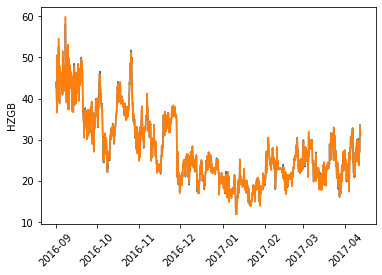

In [92]:
# plotanje radi usporedbe predviđene i dobivene vrijednosti
plt.figure()
plt.plot(train_y)
y_hat_rescaled = pd.DataFrame(y_hat_rescaled)
y_hat_rescaled.index = train_y.index
plt.plot(y_hat_rescaled)
plt.xticks(rotation='45')
plt.ylabel('HZGB')

In [93]:
# regresija na testnom skupu podataka
y_hat = model.predict(test_x)

In [94]:
# inverzno skaliranje
y_hat_rescaled = scly.inverse_transform(y_hat.reshape(-1, 1))

In [95]:
# metrika
mse = mean_squared_error(test_y, y_hat_rescaled)
print(mse)

0.37551283679751923


Text(0, 0.5, 'HZGB')

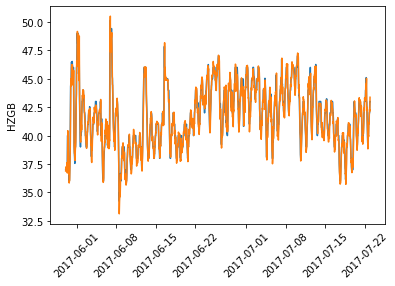

In [96]:
# plotanje radi usporedbe predviđene i dobivene vrijednosti
plt.figure()
plt.plot(test_y)
y_hat_rescaled = pd.DataFrame(y_hat_rescaled)
y_hat_rescaled.index = test_y.index
plt.plot(y_hat_rescaled)
plt.xticks(rotation='45')
plt.ylabel('HZGB')

In [97]:
# predviđanje hzgb s predict()
input_data = pd.read_csv('24h_hzgb.csv', index_col='Timestamp', parse_dates=True)
d_current = input_data.index.get_loc('2017-01-01 00:00:00')
i = 0
list_pred = np.asarray([])
while(i<24):
    series_list = input_data.iloc[d_current+i]
    df = (pd.DataFrame(series_list)).T
    pred_hzgb = model.predict(df)
    list_pred = np.insert(list_pred, i, np.take(pred_hzgb, 0))
    time = (pd.to_datetime('2017-01-01 00:00:00')+pd.to_timedelta(i+1, unit='h'))
    input_data.at[time, 'Hzgb1'] = np.take(pred_hzgb, 0)
    input_data.at[(time+pd.to_timedelta(1, unit='h')), 'Hzgb2'] = np.take(pred_hzgb, 0)
    i=i+1
list_pred    

array([ 20.86647623,  20.72207595,  21.1084004 ,  21.56807464,
        21.96663389,  22.18718704,  22.2244149 ,  22.47466984,
        21.29574004,  13.37373085,  -3.9319981 , -22.45866818,
       -39.77649516, -55.04317511, -67.04146413, -74.50079914,
       -73.12164566, -63.1124053 , -54.11646022, -46.64246882,
       -40.30694408, -34.80205771, -29.83532027, -25.28542138])

In [98]:
# lista hzgb vrijednosti iz mjerenih podataka
input_data = pd.read_csv('24h_hzgb.csv', index_col='Timestamp', parse_dates=True)
i=0
list_hzgb = []
while(i<24):
    list_hzgb = np.insert(list_hzgb, i, input_data.at[(pd.to_datetime('2017-01-01 00:00:00')+pd.to_timedelta(i+1, unit='h')), 'Hzgb1'])
    i=i+1
list_hzgb

array([21.        , 21.        , 21.        , 21.        , 21.        ,
       21.        , 21.        , 21.        , 21.        , 21.        ,
       21.        , 20.        , 20.        , 19.        , 19.        ,
       19.        , 19.97014925, 20.        , 20.        , 20.        ,
       20.        , 20.        , 20.94545455, 21.        ])

Text(0, 0.5, 'Y_PREDICTED')

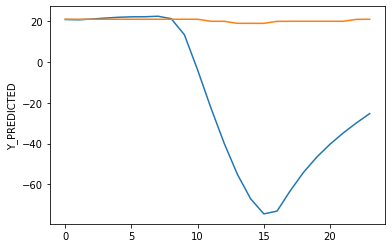

In [99]:
# plotanje radi usporedbe predviđene i dobivene vrijednosti
plt.figure()
plt.plot(list_pred)
plt.plot(list_hzgb)

# Predviđanje varijable CO2zgb

In [100]:
# vremenski ograničeni dio - najpovoljniji mjesec za set za treniranje
start = np.datetime64('2016-06-22 00:00:00')
end = np.datetime64('2016-07-22 00:00:00')
train_x = meteozone[(meteozone.index>=start) & (meteozone.index<end)].drop(['Tzgb', 'Hzgb', 'CO2zgb', 'Tqax'], axis=1)
train_x

,T_avg,Idir,Idiff,RH
Timestamp,,,,
2016-06-22 00:00:00,21.262500,0.000000,0.000000,67.333333
2016-06-22 01:00:00,20.554167,0.000000,0.000000,70.250000
2016-06-22 02:00:00,20.004167,0.000000,0.000000,71.416667
2016-06-22 03:00:00,19.625000,0.000000,0.000000,73.583333
2016-06-22 04:00:00,19.329167,0.000000,0.000000,74.750000
...,...,...,...,...
2016-07-21 19:00:00,29.187500,133.833333,61.000000,55.500000
2016-07-21 20:00:00,28.370833,20.916667,13.666667,57.083333
2016-07-21 21:00:00,27.295833,0.000000,0.000000,61.083333


In [101]:
# broj nan vrijednosti u train_x setu
train_x.isna().sum()

T_avg    5
Idir     5
Idiff    5
RH       5
dtype: int64

In [102]:
# popunjavanje rupa interpolacijom
train_x = train_x.interpolate()
train_x.isna().sum()

T_avg    0
Idir     0
Idiff    0
RH       0
dtype: int64

In [103]:
# spremanje train_x varijable
train_x.to_csv('train_x_co2.csv')
train_x

,T_avg,Idir,Idiff,RH
Timestamp,,,,
2016-06-22 00:00:00,21.262500,0.000000,0.000000,67.333333
2016-06-22 01:00:00,20.554167,0.000000,0.000000,70.250000
2016-06-22 02:00:00,20.004167,0.000000,0.000000,71.416667
2016-06-22 03:00:00,19.625000,0.000000,0.000000,73.583333
2016-06-22 04:00:00,19.329167,0.000000,0.000000,74.750000
...,...,...,...,...
2016-07-21 19:00:00,29.187500,133.833333,61.000000,55.500000
2016-07-21 20:00:00,28.370833,20.916667,13.666667,57.083333
2016-07-21 21:00:00,27.295833,0.000000,0.000000,61.083333


In [104]:
# train_y set te broj nan vrijednosti u train_y setu
train_y = meteozone[(meteozone.index>=start) & (meteozone.index<end)].CO2zgb
train_y.isna().sum()

5

In [105]:
# popunjavanje rupa interpolacijom
train_y = train_y.interpolate()
train_y = pd.DataFrame(train_y)
train_y.to_csv('train_y_co2zgb.csv')
train_y.isna().sum()

CO2zgb    0
dtype: int64

In [106]:
# vremenski ograničeni dio - najpovoljniji tjedan za set za testiranje
start = np.datetime64('2016-07-22 00:00:00')
end = np.datetime64('2016-07-29 00:00:00')
test_x = meteozone[(meteozone.index>=start) & (meteozone.index<end)].drop(['Tzgb', 'Hzgb', 'CO2zgb', 'Tqax'], axis=1)
test_x

,T_avg,Idir,Idiff,RH
Timestamp,,,,
2016-07-22 00:00:00,25.650000,0.000000,0.000000,65.166667
2016-07-22 01:00:00,25.212500,0.000000,0.000000,65.666667
2016-07-22 02:00:00,24.516667,0.000000,0.000000,67.583333
2016-07-22 03:00:00,23.879167,0.000000,0.000000,69.583333
2016-07-22 04:00:00,23.300000,0.000000,0.000000,73.333333
...,...,...,...,...
2016-07-28 19:00:00,23.231818,10.727273,42.000000,79.363636
2016-07-28 20:00:00,22.962500,0.000000,8.916667,79.000000
2016-07-28 21:00:00,22.179167,0.000000,0.000000,80.750000


In [107]:
# broj nan vrijednosti u test_x setu
test_x.isna().sum()

T_avg    0
Idir     0
Idiff    0
RH       0
dtype: int64

In [108]:
# popunjavanje rupa interpolacijom
test_x = test_x.interpolate()
test_x.to_csv('test_x_co2zgb.csv')
test_x.isna().sum()

T_avg    0
Idir     0
Idiff    0
RH       0
dtype: int64

In [109]:
# test_y set te broj nan vrijednosti u test_y setu
test_y = meteozone[(meteozone.index>=start) & (meteozone.index<end)].CO2zgb
test_y.isna().sum()

0

In [110]:
# spremanje podataka 
test_y = pd.DataFrame(test_y)
test_y.to_csv('test_y_co2zgb.csv')
test_y

,CO2zgb
Timestamp,
2016-07-22 00:00:00,2590.615385
2016-07-22 01:00:00,2620.285714
2016-07-22 02:00:00,2648.363636
2016-07-22 03:00:00,2612.750000
2016-07-22 04:00:00,2603.500000
...,...
2016-07-28 19:00:00,2088.266667
2016-07-28 20:00:00,2113.347826
2016-07-28 21:00:00,2125.875000


## Predviđanje CO2zgb bez shifta

In [111]:
# brisanje prva 24 retka tako da u svakom slučaju imamo istu količinu redaka train i test seta
i=24
train_x = train_x.iloc[i:]
test_x = test_x.iloc[i:]
train_y = train_y.iloc[i:]
test_y = test_y.iloc[i:]
train_x

,T_avg,Idir,Idiff,RH
Timestamp,,,,
2016-06-23 00:00:00,25.179167,0.000000,0.000000,59.250000
2016-06-23 01:00:00,24.166667,0.000000,0.000000,63.833333
2016-06-23 02:00:00,23.608333,0.000000,0.000000,65.666667
2016-06-23 03:00:00,22.387500,0.000000,0.000000,71.250000
2016-06-23 04:00:00,21.483333,0.000000,0.000000,76.250000
...,...,...,...,...
2016-07-21 19:00:00,29.187500,133.833333,61.000000,55.500000
2016-07-21 20:00:00,28.370833,20.916667,13.666667,57.083333
2016-07-21 21:00:00,27.295833,0.000000,0.000000,61.083333


In [112]:
# skaliranje varijabli (bez shifta)
sclx = StandardScaler()
train_x = pd.DataFrame(sclx.fit_transform(train_x))
train_x.columns = ['T_avg','Idir','Idiff','RH']
test_x = pd.DataFrame(sclx.transform (test_x))
test_x.columns = ['T_avg','Idir','Idiff','RH']
train_x

,T_avg,Idir,Idiff,RH
0,0.077050,-0.779508,-0.811459,-0.027041
1,-0.058297,-0.779508,-0.811459,0.404504
2,-0.132933,-0.779508,-0.811459,0.577122
3,-0.296130,-0.779508,-0.811459,1.102822
4,-0.416995,-0.779508,-0.811459,1.573598
...,...,...,...,...
691,0.612870,-0.326000,-0.292872,-0.380123
692,0.503701,-0.708629,-0.695273,-0.231044
693,0.359998,-0.779508,-0.811459,0.145577
694,0.187333,-0.779508,-0.811459,0.561429


In [113]:
# skaliranje varijable za predviđanje
scly = StandardScaler()
train_y_reshaped = pd.DataFrame(scly.fit_transform(train_y.values.reshape(-1, 1)))
train_y_reshaped.columns = ['CO2zgb']
test_y_reshaped = pd.DataFrame(scly.transform(test_y.values.reshape(-1, 1)))
test_y_reshaped.columns = ['CO2zgb']
test_y_reshaped.head()

,CO2zgb
0,1.506738
1,1.453542
2,1.406053
3,1.345557
4,1.311414


In [114]:
# regresija
model = LinearRegression()
model.fit(X=train_x, y=train_y_reshaped)
y_hat = model.predict(train_x)

In [115]:
# inverzno skaliranje
y_hat_rescaled = scly.inverse_transform(y_hat.reshape(-1, 1))

In [116]:
# metrika
mse = mean_squared_error(train_y, y_hat_rescaled)
print(mse)

229188.30365972468


Text(0, 0.5, 'CO2')

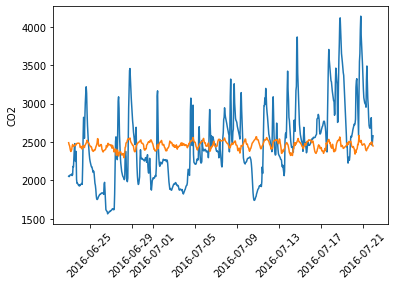

In [117]:
# plotanje radi usporedbe predviđene i dobivene vrijednosti
plt.figure()
plt.plot(train_y)
y_hat_rescaled = pd.DataFrame(y_hat_rescaled)
y_hat_rescaled.index = train_y.index
plt.plot(y_hat_rescaled)
plt.xticks(rotation='45')
plt.ylabel('CO2')

In [118]:
# regresija na testnom skupu podataka
y_hat = model.predict(test_x)

In [119]:
# inverzno skaliranje
y_hat_rescaled = scly.inverse_transform(y_hat.reshape(-1, 1))

In [120]:
# metrika
mse = mean_squared_error(test_y, y_hat_rescaled)
print(mse)

135800.80111098217


Text(0, 0.5, 'CO2')

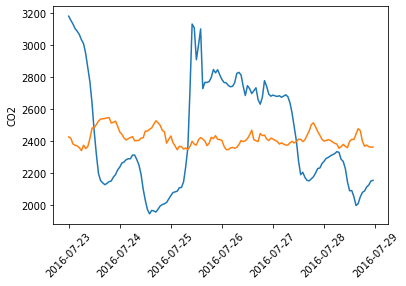

In [121]:
# plotanje radi usporedbe predviđene i dobivene vrijednosti
plt.figure()
plt.plot(test_y)
y_hat_rescaled = pd.DataFrame(y_hat_rescaled)
y_hat_rescaled.index = test_y.index
plt.plot(y_hat_rescaled)
plt.xticks(rotation='45')
plt.ylabel('CO2')

## Predviđanje CO2zgb sa shiftom unazad 2 h

In [122]:
# shift podataka
train_x = pd.read_csv('train_x_co2.csv', index_col='Timestamp', parse_dates=True)
test_x = pd.read_csv('test_x_co2zgb.csv', index_col='Timestamp', parse_dates=True)
train_y = pd.read_csv('train_y_co2zgb.csv', index_col='Timestamp', parse_dates=True)
test_y = pd.read_csv('test_y_co2zgb.csv', index_col='Timestamp', parse_dates=True)

cols = ['T_avg', 'Idir', 'Idiff', 'RH']
i=1
while i!=3:
   for col in cols:
       train_x[f'{col}{i}'] = train_x[col].shift(i)
       test_x[f'{col}{i}'] = test_x[col].shift(i) 
   i=i+1
test_x.head()

,T_avg,Idir,Idiff,RH,T_avg1,Idir1,Idiff1,RH1,T_avg2,Idir2,Idiff2,RH2
Timestamp,,,,,,,,,,,,
2016-07-22 00:00:00,25.650000,0.0,0.0,65.166667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-22 01:00:00,25.212500,0.0,0.0,65.666667,25.650000,0.0,0.0,65.166667,NaN,NaN,NaN,NaN
2016-07-22 02:00:00,24.516667,0.0,0.0,67.583333,25.212500,0.0,0.0,65.666667,25.650000,0.0,0.0,65.166667
2016-07-22 03:00:00,23.879167,0.0,0.0,69.583333,24.516667,0.0,0.0,67.583333,25.212500,0.0,0.0,65.666667
2016-07-22 04:00:00,23.300000,0.0,0.0,73.333333,23.879167,0.0,0.0,69.583333,24.516667,0.0,0.0,67.583333


In [123]:
# brisanje prvih 24 retka tako da u svakom slučaju imamo istu količinu redaka train i test seta
i=24
train_x = train_x.iloc[i:]
test_x = test_x.iloc[i:]
train_y = train_y.iloc[i:]
test_y = test_y.iloc[i:]
train_x

,T_avg,Idir,Idiff,RH,T_avg1,Idir1,Idiff1,RH1,T_avg2,Idir2,Idiff2,RH2
Timestamp,,,,,,,,,,,,
2016-06-23 00:00:00,25.179167,0.000000,0.000000,59.250000,25.529167,0.000000,0.000000,59.000000,25.575000,0.000000,0.000000,60.250000
2016-06-23 01:00:00,24.166667,0.000000,0.000000,63.833333,25.179167,0.000000,0.000000,59.250000,25.529167,0.000000,0.000000,59.000000
2016-06-23 02:00:00,23.608333,0.000000,0.000000,65.666667,24.166667,0.000000,0.000000,63.833333,25.179167,0.000000,0.000000,59.250000
2016-06-23 03:00:00,22.387500,0.000000,0.000000,71.250000,23.608333,0.000000,0.000000,65.666667,24.166667,0.000000,0.000000,63.833333
2016-06-23 04:00:00,21.483333,0.000000,0.000000,76.250000,22.387500,0.000000,0.000000,71.250000,23.608333,0.000000,0.000000,65.666667
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-07-21 19:00:00,29.187500,133.833333,61.000000,55.500000,29.954167,254.750000,91.666667,53.500000,30.800000,631.000000,123.000000,51.083333
2016-07-21 20:00:00,28.370833,20.916667,13.666667,57.083333,29.187500,133.833333,61.000000,55.500000,29.954167,254.750000,91.666667,53.500000
2016-07-21 21:00:00,27.295833,0.000000,0.000000,61.083333,28.370833,20.916667,13.666667,57.083333,29.187500,133.833333,61.000000,55.500000


In [124]:
# skaliranje varijabli
train_x = pd.DataFrame(sclx.fit_transform(train_x))
train_x.columns = ['T_avg','Idir','Idiff','RH','T_avg1','Idir1','Idiff1','RH1','T_avg2','Idir2','Idiff2','RH2']
test_x = pd.DataFrame(sclx.transform (test_x))
test_x.columns = ['T_avg','Idir','Idiff','RH','T_avg1','Idir1','Idiff1','RH1','T_avg2','Idir2','Idiff2','RH2']
train_x

,T_avg,Idir,Idiff,RH,T_avg1,Idir1,Idiff1,RH1,T_avg2,Idir2,Idiff2,RH2
0,0.077050,-0.779508,-0.811459,-0.027041,0.123835,-0.779508,-0.811459,-0.049548,0.130046,-0.779508,-0.811459,0.068911
1,-0.058297,-0.779508,-0.811459,0.404504,0.077049,-0.779508,-0.811459,-0.026001,0.123919,-0.779508,-0.811459,-0.048848
2,-0.132933,-0.779508,-0.811459,0.577122,-0.058299,-0.779508,-0.811459,0.405686,0.077132,-0.779508,-0.811459,-0.025296
3,-0.296130,-0.779508,-0.811459,1.102822,-0.132935,-0.779508,-0.811459,0.578361,-0.058217,-0.779508,-0.811459,0.406488
4,-0.416995,-0.779508,-0.811459,1.573598,-0.296131,-0.779508,-0.811459,1.104234,-0.132854,-0.779508,-0.811459,0.579201
...,...,...,...,...,...,...,...,...,...,...,...,...
691,0.612870,-0.326000,-0.292872,-0.380123,0.715353,0.083737,-0.032161,-0.567573,0.828514,1.358697,0.234218,-0.794657
692,0.503701,-0.708629,-0.695273,-0.231044,0.612868,-0.326000,-0.292872,-0.379200,0.715445,0.083737,-0.032161,-0.566989
693,0.359998,-0.779508,-0.811459,0.145577,0.503699,-0.708629,-0.695273,-0.230072,0.612958,-0.326000,-0.292872,-0.378574
694,0.187333,-0.779508,-0.811459,0.561429,0.359997,-0.779508,-0.811459,0.146674,0.503788,-0.708629,-0.695273,-0.229413


In [125]:
# skaliranje varijable za predviđanje
train_y_reshaped = pd.DataFrame(scly.fit_transform(train_y.values.reshape(-1, 1)))
train_y_reshaped.columns = ['CO2zgb']
test_y_reshaped = pd.DataFrame(scly.transform(test_y.values.reshape(-1, 1)))
test_y_reshaped.columns = ['CO2zgb']
test_y_reshaped.head()

,CO2zgb
0,1.506738
1,1.453542
2,1.406053
3,1.345557
4,1.311414


In [126]:
# regresija
model.fit(X=train_x, y=train_y_reshaped)
y_hat = model.predict(train_x)

In [127]:
# inverzno skaliranje
y_hat_rescaled = scly.inverse_transform(y_hat.reshape(-1, 1))

In [128]:
# metrika
mse = mean_squared_error(train_y, y_hat_rescaled)
print(mse)

227890.7459853217


Text(0, 0.5, 'CO2')

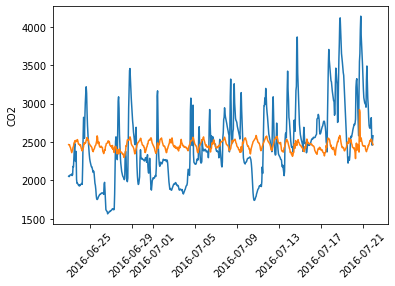

In [129]:
# plotanje radi usporedbe predviđene i dobivene vrijednosti
plt.figure()
plt.plot(train_y)
y_hat_rescaled = pd.DataFrame(y_hat_rescaled)
y_hat_rescaled.index = train_y.index
plt.plot(y_hat_rescaled)
plt.xticks(rotation='45')
plt.ylabel('CO2')

In [130]:
# regresija na testnom skupu podataka
y_hat = model.predict(test_x)

In [131]:
# inverzno skaliranje
y_hat_rescaled = scly.inverse_transform(y_hat.reshape(-1, 1))

In [132]:
# metrika
mse = mean_squared_error(test_y, y_hat_rescaled)
print(mse)

138468.17745296858


Text(0, 0.5, 'CO2')

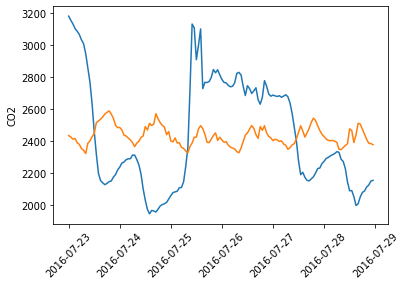

In [133]:
# plotanje radi usporedbe predviđene i dobivene vrijednosti
plt.figure()
plt.plot(test_y)
y_hat_rescaled = pd.DataFrame(y_hat_rescaled)
y_hat_rescaled.index = test_y.index
plt.plot(y_hat_rescaled)
plt.xticks(rotation='45')
plt.ylabel('CO2')

## Predviđanje CO2zgb sa shiftom unazad 5 h

In [134]:
# shift podataka
train_x = pd.read_csv('train_x_co2.csv', index_col='Timestamp', parse_dates=True)
test_x = pd.read_csv('test_x_co2zgb.csv', index_col='Timestamp', parse_dates=True)
train_y = pd.read_csv('train_y_co2zgb.csv', index_col='Timestamp', parse_dates=True)
test_y = pd.read_csv('test_y_co2zgb.csv', index_col='Timestamp', parse_dates=True)

cols = ['T_avg', 'Idir', 'Idiff', 'RH']
i=1
while i!=6:
    for col in cols:
        train_x[f'{col}{i}'] = train_x[col].shift(i)
        test_x[f'{col}{i}'] = test_x[col].shift(i) 
    i=i+1
test_x.head()

,T_avg,Idir,Idiff,RH,T_avg1,Idir1,Idiff1,RH1,T_avg2,Idir2,...,Idiff3,RH3,T_avg4,Idir4,Idiff4,RH4,T_avg5,Idir5,Idiff5,RH5
Timestamp,,,,,,,,,,,,,,,,,,,,,
2016-07-22 00:00:00,25.650000,0.0,0.0,65.166667,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-22 01:00:00,25.212500,0.0,0.0,65.666667,25.650000,0.0,0.0,65.166667,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-22 02:00:00,24.516667,0.0,0.0,67.583333,25.212500,0.0,0.0,65.666667,25.650000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-22 03:00:00,23.879167,0.0,0.0,69.583333,24.516667,0.0,0.0,67.583333,25.212500,0.0,...,0.0,65.166667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-22 04:00:00,23.300000,0.0,0.0,73.333333,23.879167,0.0,0.0,69.583333,24.516667,0.0,...,0.0,65.666667,25.65,0.0,0.0,65.166667,NaN,NaN,NaN,NaN


In [135]:
# brisanje prva 24 retka tako da u svakom slučaju imamo istu količinu redaka train i test seta
i=24
train_x = train_x.iloc[i:]
test_x = test_x.iloc[i:]
train_y = train_y.iloc[i:]
test_y = test_y.iloc[i:]
train_x

,T_avg,Idir,Idiff,RH,T_avg1,Idir1,Idiff1,RH1,T_avg2,Idir2,...,Idiff3,RH3,T_avg4,Idir4,Idiff4,RH4,T_avg5,Idir5,Idiff5,RH5
Timestamp,,,,,,,,,,,,,,,,,,,,,
2016-06-23 00:00:00,25.179167,0.000000,0.000000,59.250000,25.529167,0.000000,0.000000,59.000000,25.575000,0.000000,...,0.083333,60.833333,26.250000,1.166667,13.500000,61.750000,26.925000,0.083333,53.583333,60.250000
2016-06-23 01:00:00,24.166667,0.000000,0.000000,63.833333,25.179167,0.000000,0.000000,59.250000,25.529167,0.000000,...,0.000000,60.250000,25.916667,0.000000,0.083333,60.833333,26.250000,1.166667,13.500000,61.750000
2016-06-23 02:00:00,23.608333,0.000000,0.000000,65.666667,24.166667,0.000000,0.000000,63.833333,25.179167,0.000000,...,0.000000,59.000000,25.575000,0.000000,0.000000,60.250000,25.916667,0.000000,0.083333,60.833333
2016-06-23 03:00:00,22.387500,0.000000,0.000000,71.250000,23.608333,0.000000,0.000000,65.666667,24.166667,0.000000,...,0.000000,59.250000,25.529167,0.000000,0.000000,59.000000,25.575000,0.000000,0.000000,60.250000
2016-06-23 04:00:00,21.483333,0.000000,0.000000,76.250000,22.387500,0.000000,0.000000,71.250000,23.608333,0.000000,...,0.000000,63.833333,25.179167,0.000000,0.000000,59.250000,25.529167,0.000000,0.000000,59.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-07-21 19:00:00,29.187500,133.833333,61.000000,55.500000,29.954167,254.750000,91.666667,53.500000,30.800000,631.000000,...,186.750000,50.166667,31.154167,650.250000,217.000000,49.500000,31.075000,638.166667,242.333333,50.583333
2016-07-21 20:00:00,28.370833,20.916667,13.666667,57.083333,29.187500,133.833333,61.000000,55.500000,29.954167,254.750000,...,123.000000,51.083333,31.029167,484.916667,186.750000,50.166667,31.154167,650.250000,217.000000,49.500000
2016-07-21 21:00:00,27.295833,0.000000,0.000000,61.083333,28.370833,20.916667,13.666667,57.083333,29.187500,133.833333,...,91.666667,53.500000,30.800000,631.000000,123.000000,51.083333,31.029167,484.916667,186.750000,50.166667


In [136]:
# skaliranje varijabli
train_x = pd.DataFrame(sclx.fit_transform(train_x))
train_x.columns = ['T_avg','Idir','Idiff','RH','T_avg1','Idir1','Idiff1','RH1','T_avg2','Idir2','Idiff2','RH2', 'T_avg3','Idir3','Idiff3','RH3','T_avg4','Idir4','Idiff4','RH4','T_avg5','Idir5','Idiff5','RH5',]
test_x = pd.DataFrame(sclx.transform (test_x))
test_x.columns = ['T_avg','Idir','Idiff','RH','T_avg1','Idir1','Idiff1','RH1','T_avg2','Idir2','Idiff2','RH2', 'T_avg3','Idir3','Idiff3','RH3','T_avg4','Idir4','Idiff4','RH4','T_avg5','Idir5','Idiff5','RH5',]
train_x

,T_avg,Idir,Idiff,RH,T_avg1,Idir1,Idiff1,RH1,T_avg2,Idir2,...,Idiff3,RH3,T_avg4,Idir4,Idiff4,RH4,T_avg5,Idir5,Idiff5,RH5
0,0.077050,-0.779508,-0.811459,-0.027041,0.123835,-0.779508,-0.811459,-0.049548,0.130046,-0.779508,...,-0.810753,0.123900,0.221000,-0.775403,-0.696689,0.209627,0.311749,-0.778143,-0.355822,0.067678
1,-0.058297,-0.779508,-0.811459,0.404504,0.077049,-0.779508,-0.811459,-0.026001,0.123919,-0.779508,...,-0.811461,0.068945,0.176430,-0.779356,-0.810749,0.123269,0.221479,-0.774473,-0.696577,0.209005
2,-0.132933,-0.779508,-0.811459,0.577122,-0.058299,-0.779508,-0.811459,0.405686,0.077132,-0.779508,...,-0.811461,-0.048815,0.130747,-0.779356,-0.811458,0.068314,0.176901,-0.778425,-0.810635,0.122638
3,-0.296130,-0.779508,-0.811459,1.102822,-0.132935,-0.779508,-0.811459,0.578361,-0.058217,-0.779508,...,-0.811461,-0.025263,0.124619,-0.779356,-0.811458,-0.049447,0.131208,-0.778425,-0.811343,0.067678
4,-0.416995,-0.779508,-0.811459,1.573598,-0.296131,-0.779508,-0.811459,1.104234,-0.132854,-0.779508,...,-0.811461,0.406523,0.077821,-0.779356,-0.811458,-0.025895,0.125079,-0.778425,-0.811343,-0.050095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,0.612870,-0.326000,-0.292872,-0.380123,0.715353,0.083737,-0.032161,-0.567573,0.828514,1.358697,...,0.776184,-0.880984,0.876723,1.423922,1.033353,-0.944427,0.866746,1.383133,1.248777,-0.843095
692,0.503701,-0.708629,-0.695273,-0.231044,0.612868,-0.326000,-0.292872,-0.379200,0.715445,0.083737,...,0.234217,-0.794627,0.860009,0.863714,0.776185,-0.881622,0.877334,1.424061,1.033413,-0.945165
693,0.359998,-0.779508,-0.811459,0.145577,0.503699,-0.708629,-0.695273,-0.230072,0.612958,-0.326000,...,-0.032162,-0.566958,0.829368,1.358696,0.234218,-0.795264,0.860617,0.864055,0.776253,-0.882353
694,0.187333,-0.779508,-0.811459,0.561429,0.359997,-0.779508,-0.811459,0.146674,0.503788,-0.708629,...,-0.292873,-0.378542,0.716274,0.083828,-0.032160,-0.567593,0.829969,1.358859,0.234302,-0.795986


In [137]:
# skaliranje varijable za predviđanje
train_y_reshaped = pd.DataFrame(scly.fit_transform(train_y.values.reshape(-1, 1)))
train_y_reshaped.columns = ['CO2zgb']
test_y_reshaped = pd.DataFrame(scly.transform(test_y.values.reshape(-1, 1)))
test_y_reshaped.columns = ['CO2zgb']
test_y_reshaped.head()

,CO2zgb
0,1.506738
1,1.453542
2,1.406053
3,1.345557
4,1.311414


In [138]:
# regresija
model.fit(X=train_x, y=train_y_reshaped)
y_hat = model.predict(train_x)

In [139]:
# inverzno skaliranje
y_hat_rescaled = scly.inverse_transform(y_hat.reshape(-1, 1))

In [140]:
# metrika
mse = mean_squared_error(train_y, y_hat_rescaled)
print(mse)

225989.08999346953


Text(0, 0.5, 'CO2')

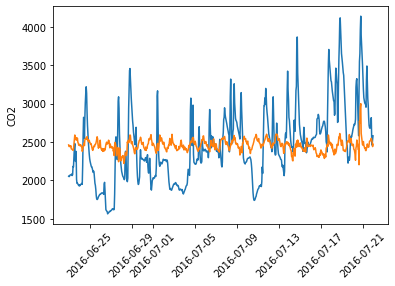

In [141]:
# plotanje radi usporedbe predviđene i dobivene vrijednosti
plt.figure()
plt.plot(train_y)
y_hat_rescaled = pd.DataFrame(y_hat_rescaled)
y_hat_rescaled.index = train_y.index
plt.plot(y_hat_rescaled)
plt.xticks(rotation='45')
plt.ylabel('CO2')

In [142]:
# regresija na testnom skupu podataka
y_hat = model.predict(test_x)

In [143]:
# inverzno skaliranje
y_hat_rescaled = scly.inverse_transform(y_hat.reshape(-1, 1))

In [144]:
# metrika
mse = mean_squared_error(test_y, y_hat_rescaled)
print(mse)

143834.1899718409


Text(0, 0.5, 'CO2')

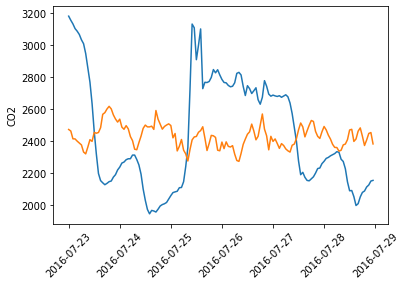

In [145]:
# plotanje radi usporedbe predviđene i dobivene vrijednosti
plt.figure()
plt.plot(test_y)
y_hat_rescaled = pd.DataFrame(y_hat_rescaled)
y_hat_rescaled.index = test_y.index
plt.plot(y_hat_rescaled)
plt.xticks(rotation='45')
plt.ylabel('CO2')

## Predviđanje CO2zgb sa shiftom unazad 3 h (uključeno i mjerenje od prethodnog dana)

In [146]:
# shift podataka
train_x = pd.read_csv('train_x_co2.csv', index_col='Timestamp', parse_dates=True)
test_x = pd.read_csv('test_x_co2zgb.csv', index_col='Timestamp', parse_dates=True)
train_y = pd.read_csv('train_y_co2zgb.csv', index_col='Timestamp', parse_dates=True)
test_y = pd.read_csv('test_y_co2zgb.csv', index_col='Timestamp', parse_dates=True)

cols = ['T_avg', 'Idir', 'Idiff', 'RH']
i=1
while i!=4:
   for col in cols:
       train_x[f'{col}{i}'] = train_x[col].shift(i)
       test_x[f'{col}{i}'] = test_x[col].shift(i) 
   i=i+1
for col in cols:
   train_x[f'{col}{24}'] = train_x[col].shift(24)
   test_x[f'{col}{24}'] = test_x[col].shift(24) 

test_x.head()

,T_avg,Idir,Idiff,RH,T_avg1,Idir1,Idiff1,RH1,T_avg2,Idir2,Idiff2,RH2,T_avg3,Idir3,Idiff3,RH3,T_avg24,Idir24,Idiff24,RH24
Timestamp,,,,,,,,,,,,,,,,,,,,
2016-07-22 00:00:00,25.650000,0.0,0.0,65.166667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-22 01:00:00,25.212500,0.0,0.0,65.666667,25.650000,0.0,0.0,65.166667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-22 02:00:00,24.516667,0.0,0.0,67.583333,25.212500,0.0,0.0,65.666667,25.650000,0.0,0.0,65.166667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-22 03:00:00,23.879167,0.0,0.0,69.583333,24.516667,0.0,0.0,67.583333,25.212500,0.0,0.0,65.666667,25.6500,0.0,0.0,65.166667,NaN,NaN,NaN,NaN
2016-07-22 04:00:00,23.300000,0.0,0.0,73.333333,23.879167,0.0,0.0,69.583333,24.516667,0.0,0.0,67.583333,25.2125,0.0,0.0,65.666667,NaN,NaN,NaN,NaN


In [147]:
# brisanje prva 24 retka tako da u svakom slučaju imamo istu količinu redaka train i test seta
i=24
train_x = train_x.iloc[i:]
test_x = test_x.iloc[i:]
train_y = train_y.iloc[i:]
test_y = test_y.iloc[i:]
train_x

,T_avg,Idir,Idiff,RH,T_avg1,Idir1,Idiff1,RH1,T_avg2,Idir2,Idiff2,RH2,T_avg3,Idir3,Idiff3,RH3,T_avg24,Idir24,Idiff24,RH24
Timestamp,,,,,,,,,,,,,,,,,,,,
2016-06-23 00:00:00,25.179167,0.000000,0.000000,59.250000,25.529167,0.000000,0.000000,59.000000,25.575000,0.000000,0.000000,60.250000,25.916667,0.000000,0.083333,60.833333,21.262500,0.000000,0.000000,67.333333
2016-06-23 01:00:00,24.166667,0.000000,0.000000,63.833333,25.179167,0.000000,0.000000,59.250000,25.529167,0.000000,0.000000,59.000000,25.575000,0.000000,0.000000,60.250000,20.554167,0.000000,0.000000,70.250000
2016-06-23 02:00:00,23.608333,0.000000,0.000000,65.666667,24.166667,0.000000,0.000000,63.833333,25.179167,0.000000,0.000000,59.250000,25.529167,0.000000,0.000000,59.000000,20.004167,0.000000,0.000000,71.416667
2016-06-23 03:00:00,22.387500,0.000000,0.000000,71.250000,23.608333,0.000000,0.000000,65.666667,24.166667,0.000000,0.000000,63.833333,25.179167,0.000000,0.000000,59.250000,19.625000,0.000000,0.000000,73.583333
2016-06-23 04:00:00,21.483333,0.000000,0.000000,76.250000,22.387500,0.000000,0.000000,71.250000,23.608333,0.000000,0.000000,65.666667,24.166667,0.000000,0.000000,63.833333,19.329167,0.000000,0.000000,74.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-07-21 19:00:00,29.187500,133.833333,61.000000,55.500000,29.954167,254.750000,91.666667,53.500000,30.800000,631.000000,123.000000,51.083333,31.029167,484.916667,186.750000,50.166667,28.487500,358.750000,45.000000,50.750000
2016-07-21 20:00:00,28.370833,20.916667,13.666667,57.083333,29.187500,133.833333,61.000000,55.500000,29.954167,254.750000,91.666667,53.500000,30.800000,631.000000,123.000000,51.083333,27.458333,33.333333,7.583333,53.583333
2016-07-21 21:00:00,27.295833,0.000000,0.000000,61.083333,28.370833,20.916667,13.666667,57.083333,29.187500,133.833333,61.000000,55.500000,29.954167,254.750000,91.666667,53.500000,25.545833,0.000000,0.000000,61.583333


In [148]:
# skaliranje varijabli
train_x = pd.DataFrame(sclx.fit_transform(train_x))
train_x.columns = ['T_avg','Idir','Idiff','RH','T_avg1','Idir1','Idiff1','RH1','T_avg2','Idir2','Idiff2','RH2', 'T_avg3','Idir3','Idiff3','RH3', 'T_avg24','Idir24','Idiff24','RH24']
test_x = pd.DataFrame(sclx.transform (test_x))
test_x.columns = ['T_avg','Idir','Idiff','RH','T_avg1','Idir1','Idiff1','RH1','T_avg2','Idir2','Idiff2','RH2', 'T_avg3','Idir3','Idiff3','RH3','T_avg24','Idir24','Idiff24','RH24']
train_x

,T_avg,Idir,Idiff,RH,T_avg1,Idir1,Idiff1,RH1,T_avg2,Idir2,Idiff2,RH2,T_avg3,Idir3,Idiff3,RH3,T_avg24,Idir24,Idiff24,RH24
0,0.077050,-0.779508,-0.811459,-0.027041,0.123835,-0.779508,-0.811459,-0.049548,0.130046,-0.779508,-0.811459,0.068911,0.175997,-0.779508,-0.810753,0.123900,-0.437780,-0.766109,-0.805368,0.718288
1,-0.058297,-0.779508,-0.811459,0.404504,0.077049,-0.779508,-0.811459,-0.026001,0.123919,-0.779508,-0.811459,-0.048848,0.130320,-0.779508,-0.811461,0.068945,-0.532594,-0.766109,-0.805368,0.991677
2,-0.132933,-0.779508,-0.811459,0.577122,-0.058299,-0.779508,-0.811459,0.405686,0.077132,-0.779508,-0.811459,-0.025296,0.124193,-0.779508,-0.811461,-0.048815,-0.606214,-0.766109,-0.805368,1.101033
3,-0.296130,-0.779508,-0.811459,1.102822,-0.132935,-0.779508,-0.811459,0.578361,-0.058217,-0.779508,-0.811459,0.406488,0.077402,-0.779508,-0.811461,-0.025263,-0.656968,-0.766109,-0.805368,1.304122
4,-0.416995,-0.779508,-0.811459,1.573598,-0.296131,-0.779508,-0.811459,1.104234,-0.132854,-0.779508,-0.811459,0.579201,-0.057956,-0.779508,-0.811461,0.406523,-0.696567,-0.766109,-0.805368,1.413478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,0.612870,-0.326000,-0.292872,-0.380123,0.715353,0.083737,-0.032161,-0.567573,0.828514,1.358697,0.234218,-0.794657,0.859475,0.863680,0.776184,-0.880984,0.529326,0.469710,-0.437431,-0.836126
692,0.503701,-0.708629,-0.695273,-0.231044,0.612868,-0.326000,-0.292872,-0.379200,0.715445,0.083737,-0.032161,-0.566989,0.828838,1.358697,0.234217,-0.794627,0.391566,-0.651283,-0.743364,-0.570548
693,0.359998,-0.779508,-0.811459,0.145577,0.503699,-0.708629,-0.695273,-0.230072,0.612958,-0.326000,-0.292872,-0.378574,0.715761,0.083737,-0.032162,-0.566958,0.135568,-0.766109,-0.805368,0.179320
694,0.187333,-0.779508,-0.811459,0.561429,0.359997,-0.779508,-0.811459,0.146674,0.503788,-0.708629,-0.695273,-0.229413,0.613267,-0.326000,-0.292873,-0.378542,0.018444,-0.766109,-0.805368,0.437087


In [149]:
# skaliranje varijable za predviđanje
train_y_reshaped = pd.DataFrame(scly.fit_transform(train_y.values.reshape(-1, 1)))
train_y_reshaped.columns = ['CO2zgb']
test_y_reshaped = pd.DataFrame(scly.transform(test_y.values.reshape(-1, 1)))
test_y_reshaped.columns = ['CO2zgb']
test_y_reshaped.head()

,CO2zgb
0,1.506738
1,1.453542
2,1.406053
3,1.345557
4,1.311414


In [150]:
# regresija
model.fit(X=train_x, y=train_y_reshaped)
y_hat = model.predict(train_x)

In [151]:
# inverzno skaliranje
y_hat_rescaled = scly.inverse_transform(y_hat.reshape(-1, 1))

In [152]:
# metrika
mse = mean_squared_error(train_y, y_hat_rescaled)
print(mse)

222212.50975688323


Text(0, 0.5, 'CO2')

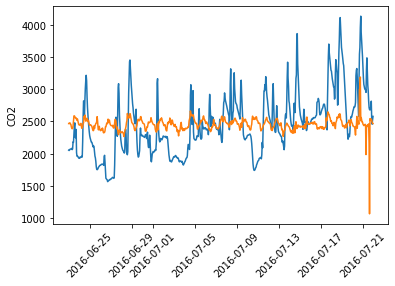

In [153]:
# plotanje radi usporedbe predviđene i dobivene vrijednosti
plt.figure()
plt.plot(train_y)
y_hat_rescaled = pd.DataFrame(y_hat_rescaled)
y_hat_rescaled.index = train_y.index
plt.plot(y_hat_rescaled)
plt.xticks(rotation='45')
plt.ylabel('CO2')

In [154]:
# regresija na testnom skupu podataka
y_hat = model.predict(test_x)

In [155]:
# inverzno skaliranje
y_hat_rescaled = scly.inverse_transform(y_hat.reshape(-1, 1))

In [156]:
# metrika
mse = mean_squared_error(test_y, y_hat_rescaled)
print(mse)

137160.87242524693


Text(0, 0.5, 'CO2')

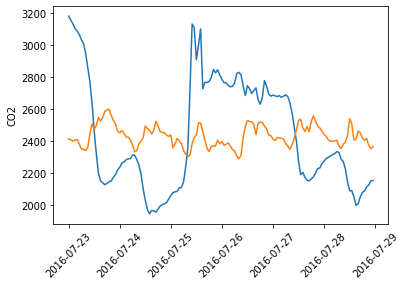

In [157]:
# plotanje radi usporedbe predviđene i dobivene vrijednosti
plt.figure()
plt.plot(test_y)
y_hat_rescaled = pd.DataFrame(y_hat_rescaled)
y_hat_rescaled.index = test_y.index
plt.plot(y_hat_rescaled)
plt.xticks(rotation='45')
plt.ylabel('CO2')

## Predviđanje varijable CO2 24 h unaprijed

In [158]:
# izvlačenje podataka potrebnih za predviđanje
train_x = pd.read_csv('train_x_co2.csv', index_col='Timestamp', parse_dates=True)
train_y = pd.read_csv('train_y_co2zgb.csv', index_col='Timestamp', parse_dates=True)
test_x = pd.read_csv('test_x_co2zgb.csv', index_col='Timestamp', parse_dates=True)
test_y = pd.read_csv('test_y_co2zgb.csv', index_col='Timestamp', parse_dates=True)
train_x = pd.merge(train_x, train_y, how='left', on=['Timestamp'])
test_x = pd.merge(test_x, test_y, how='left', on=['Timestamp'])
train_x

,T_avg,Idir,Idiff,RH,CO2zgb
Timestamp,,,,,
2016-06-22 00:00:00,21.262500,0.000000,0.000000,67.333333,2505.666667
2016-06-22 01:00:00,20.554167,0.000000,0.000000,70.250000,2491.964286
2016-06-22 02:00:00,20.004167,0.000000,0.000000,71.416667,2479.526316
2016-06-22 03:00:00,19.625000,0.000000,0.000000,73.583333,2465.843750
2016-06-22 04:00:00,19.329167,0.000000,0.000000,74.750000,2463.062500
...,...,...,...,...,...
2016-07-21 19:00:00,29.187500,133.833333,61.000000,55.500000,2815.732394
2016-07-21 20:00:00,28.370833,20.916667,13.666667,57.083333,2528.514286
2016-07-21 21:00:00,27.295833,0.000000,0.000000,61.083333,2457.513889


In [159]:
# shift podataka
cols = ['T_avg', 'Idir', 'Idiff', 'RH', 'CO2zgb']
i=1
while i!=4:
    for col in cols:
        train_x[f'{col}{i}'] = train_x[col].shift(i)
        test_x[f'{col}{i}'] = test_x[col].shift(i) 
    i=i+1
for col in cols:
    train_x[f'{col}{24}'] = train_x[col].shift(24)
    test_x[f'{col}{24}'] = test_x[col].shift(24) 
    
train_x = train_x.drop(['CO2zgb'], axis=1)  
test_x = test_x.drop(['CO2zgb'], axis=1) 
test_x.head()

,T_avg,Idir,Idiff,RH,T_avg1,Idir1,Idiff1,RH1,CO2zgb1,T_avg2,...,T_avg3,Idir3,Idiff3,RH3,CO2zgb3,T_avg24,Idir24,Idiff24,RH24,CO2zgb24
Timestamp,,,,,,,,,,,,,,,,,,,,,
2016-07-22 00:00:00,25.650000,0.0,0.0,65.166667,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-22 01:00:00,25.212500,0.0,0.0,65.666667,25.650000,0.0,0.0,65.166667,2590.615385,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-22 02:00:00,24.516667,0.0,0.0,67.583333,25.212500,0.0,0.0,65.666667,2620.285714,25.650000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-22 03:00:00,23.879167,0.0,0.0,69.583333,24.516667,0.0,0.0,67.583333,2648.363636,25.212500,...,25.6500,0.0,0.0,65.166667,2590.615385,NaN,NaN,NaN,NaN,NaN
2016-07-22 04:00:00,23.300000,0.0,0.0,73.333333,23.879167,0.0,0.0,69.583333,2612.750000,24.516667,...,25.2125,0.0,0.0,65.666667,2620.285714,NaN,NaN,NaN,NaN,NaN


In [160]:
# brisanje prva 24 retka zbog Nan vrijednosti
i=24
train_x = train_x.iloc[i:]
test_x = test_x.iloc[i:]
train_y = train_y.iloc[i:]
test_y = test_y.iloc[i:]
train_x.to_csv('24h_co2zgb.csv')
train_x

,T_avg,Idir,Idiff,RH,T_avg1,Idir1,Idiff1,RH1,CO2zgb1,T_avg2,...,T_avg3,Idir3,Idiff3,RH3,CO2zgb3,T_avg24,Idir24,Idiff24,RH24,CO2zgb24
Timestamp,,,,,,,,,,,,,,,,,,,,,
2016-06-23 00:00:00,25.179167,0.000000,0.000000,59.250000,25.529167,0.000000,0.000000,59.000000,2052.307692,25.575000,...,25.916667,0.000000,0.083333,60.833333,2044.150000,21.262500,0.000000,0.000000,67.333333,2505.666667
2016-06-23 01:00:00,24.166667,0.000000,0.000000,63.833333,25.179167,0.000000,0.000000,59.250000,2054.000000,25.529167,...,25.575000,0.000000,0.000000,60.250000,2044.576923,20.554167,0.000000,0.000000,70.250000,2491.964286
2016-06-23 02:00:00,23.608333,0.000000,0.000000,65.666667,24.166667,0.000000,0.000000,63.833333,2048.517241,25.179167,...,25.529167,0.000000,0.000000,59.000000,2052.307692,20.004167,0.000000,0.000000,71.416667,2479.526316
2016-06-23 03:00:00,22.387500,0.000000,0.000000,71.250000,23.608333,0.000000,0.000000,65.666667,2054.900000,24.166667,...,25.179167,0.000000,0.000000,59.250000,2054.000000,19.625000,0.000000,0.000000,73.583333,2465.843750
2016-06-23 04:00:00,21.483333,0.000000,0.000000,76.250000,22.387500,0.000000,0.000000,71.250000,2068.137931,23.608333,...,24.166667,0.000000,0.000000,63.833333,2048.517241,19.329167,0.000000,0.000000,74.750000,2463.062500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-07-21 19:00:00,29.187500,133.833333,61.000000,55.500000,29.954167,254.750000,91.666667,53.500000,2743.653333,30.800000,...,31.029167,484.916667,186.750000,50.166667,2677.631068,28.487500,358.750000,45.000000,50.750000,4136.630769
2016-07-21 20:00:00,28.370833,20.916667,13.666667,57.083333,29.187500,133.833333,61.000000,55.500000,2815.732394,29.954167,...,30.800000,631.000000,123.000000,51.083333,2696.846154,27.458333,33.333333,7.583333,53.583333,3877.966102
2016-07-21 21:00:00,27.295833,0.000000,0.000000,61.083333,28.370833,20.916667,13.666667,57.083333,2528.514286,29.187500,...,29.954167,254.750000,91.666667,53.500000,2743.653333,25.545833,0.000000,0.000000,61.583333,3752.125000


In [161]:
# skaliranje varijabli
train_x = pd.DataFrame(sclx.fit_transform(train_x))
train_x.columns = ['T_avg','Idir','Idiff','RH','T_avg1','Idir1','Idiff1','RH1', 'CO2zgb1','T_avg2','Idir2','Idiff2','RH2', 'CO2zgb2','T_avg3','Idir3','Idiff3','RH3','CO2zgb3', 'T_avg24','Idir24','Idiff24','RH24','CO2zgb24']
test_x = pd.DataFrame(sclx.transform (test_x))
test_x.columns = ['T_avg','Idir','Idiff','RH','T_avg1','Idir1','Idiff1','RH1','CO2zgb1','T_avg2','Idir2','Idiff2','RH2','CO2zgb2', 'T_avg3','Idir3','Idiff3','RH3','CO2zgb3', 'T_avg24','Idir24','Idiff24','RH24','CO2zgb24']
train_x

,T_avg,Idir,Idiff,RH,T_avg1,Idir1,Idiff1,RH1,CO2zgb1,T_avg2,...,T_avg3,Idir3,Idiff3,RH3,CO2zgb3,T_avg24,Idir24,Idiff24,RH24,CO2zgb24
0,0.077050,-0.779508,-0.811459,-0.027041,0.123835,-0.779508,-0.811459,-0.049548,-0.837364,0.130046,...,0.175997,-0.779508,-0.810753,0.123900,-0.850743,-0.437780,-0.766109,-0.805368,0.718288,0.154551
1,-0.058297,-0.779508,-0.811459,0.404504,0.077049,-0.779508,-0.811459,-0.026001,-0.833850,0.123919,...,0.130320,-0.779508,-0.811461,0.068945,-0.849858,-0.532594,-0.766109,-0.805368,0.991677,0.125642
2,-0.132933,-0.779508,-0.811459,0.577122,-0.058299,-0.779508,-0.811459,0.405686,-0.845234,0.077132,...,0.124193,-0.779508,-0.811461,-0.048815,-0.833823,-0.606214,-0.766109,-0.805368,1.101033,0.099401
3,-0.296130,-0.779508,-0.811459,1.102822,-0.132935,-0.779508,-0.811459,0.578361,-0.831982,-0.058217,...,0.077402,-0.779508,-0.811461,-0.025263,-0.830313,-0.656968,-0.766109,-0.805368,1.304122,0.070534
4,-0.416995,-0.779508,-0.811459,1.573598,-0.296131,-0.779508,-0.811459,1.104234,-0.804497,-0.132854,...,-0.057956,-0.779508,-0.811461,0.406523,-0.841685,-0.696567,-0.766109,-0.805368,1.413478,0.064666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,0.612870,-0.326000,-0.292872,-0.380123,0.715353,0.083737,-0.032161,-0.567573,0.598020,0.828514,...,0.859475,0.863680,0.776184,-0.880984,0.463154,0.529326,0.469710,-0.437431,-0.836126,3.595491
692,0.503701,-0.708629,-0.695273,-0.231044,0.612868,-0.326000,-0.292872,-0.379200,0.747671,0.715445,...,0.828838,1.358697,0.234217,-0.794627,0.503008,0.391566,-0.651283,-0.743364,-0.570548,3.049771
693,0.359998,-0.779508,-0.811459,0.145577,0.503699,-0.708629,-0.695273,-0.230072,0.151344,0.612958,...,0.715761,0.083737,-0.032162,-0.566958,0.600090,0.135568,-0.766109,-0.805368,0.179320,2.784277
694,0.187333,-0.779508,-0.811459,0.561429,0.359997,-0.779508,-0.811459,0.146674,0.003932,0.503788,...,0.613267,-0.326000,-0.292873,-0.378542,0.749588,0.018444,-0.766109,-0.805368,0.437087,2.567833


In [162]:
# skaliranje varijable za predviđanje
train_y_reshaped = pd.DataFrame(scly.fit_transform(train_y.values.reshape(-1, 1)))
train_y_reshaped.columns = ['CO2zgb'] 
test_y_reshaped = pd.DataFrame(scly.transform(test_y.values.reshape(-1, 1)))
test_y_reshaped.columns = ['CO2zgb'] 
test_y_reshaped.head()

,CO2zgb
0,1.506738
1,1.453542
2,1.406053
3,1.345557
4,1.311414


In [163]:
# regresija
model = LinearRegression()
model.fit(X=train_x, y=train_y_reshaped)
y_hat = model.predict(train_x)

In [164]:
# inverzno skaliranje
y_hat_rescaled = scly.inverse_transform(y_hat.reshape(-1, 1))

Text(0, 0.5, 'CO2')

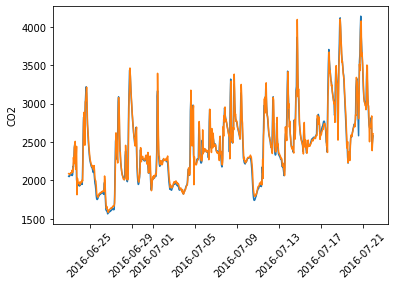

In [165]:
# plotanje radi usporedbe predviđene i dobivene vrijednosti
plt.figure()
plt.plot(train_y)
y_hat_rescaled = pd.DataFrame(y_hat_rescaled)
y_hat_rescaled.index = train_y.index
plt.plot(y_hat_rescaled)
plt.xticks(rotation='45')
plt.ylabel('CO2')

In [166]:
# regresija na testnom skupu podataka
y_hat = model.predict(test_x)

In [167]:
# inverzno skaliranje
y_hat_rescaled = scly.inverse_transform(y_hat.reshape(-1, 1))

In [168]:
# metrika
mse = mean_squared_error(test_y, y_hat_rescaled)
print(mse)

5245.666483400629


Text(0, 0.5, 'CO2')

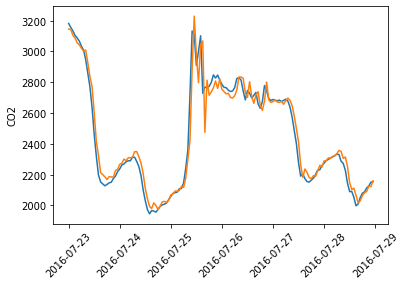

In [169]:
# plotanje radi usporedbe predviđene i dobivene vrijednosti
plt.figure()
plt.plot(test_y)
y_hat_rescaled = pd.DataFrame(y_hat_rescaled)
y_hat_rescaled.index = test_y.index
plt.plot(y_hat_rescaled)
plt.xticks(rotation='45')
plt.ylabel('CO2')

In [174]:
# predviđanje co2zgb s predict()
input_data = pd.read_csv('24h_co2zgb.csv', index_col='Timestamp', parse_dates=True)
d_current = input_data.index.get_loc('2016-07-07 00:00:00')
i = 0
list_pred = np.asarray([])
while(i<24):
    series_list = input_data.iloc[d_current+i]
    df = (pd.DataFrame(series_list)).T
    pred_co2zgb = model.predict(df)
    list_pred = np.insert(list_pred, i, np.take(pred_co2zgb, 0))
    time = (pd.to_datetime('2016-07-07 00:00:00')+pd.to_timedelta(i+1, unit='h'))
    input_data.at[time, 'CO2zgb1'] = np.take(pred_co2zgb, 0)
    input_data.at[(time+pd.to_timedelta(1, unit='h')), 'CO2zgb2'] = np.take(pred_co2zgb, 0)
    input_data.at[(time+pd.to_timedelta(2, unit='h')), 'CO2zgb3'] = np.take(pred_co2zgb, 0)
    print(df)
    i=i+1
list_pred    

             T_avg  Idir  Idiff         RH   T_avg1  Idir1  Idiff1    RH1  \
2016-07-07  20.075   0.0    0.0  67.833333  21.4625    0.0     0.0  68.75   

            CO2zgb1     T_avg2  ...   T_avg3  Idir3  Idiff3        RH3  \
2016-07-07   2472.0  22.736364  ...  23.2625    0.0     0.0  64.916667   

            CO2zgb3    T_avg24  Idir24  Idiff24       RH24     CO2zgb24  
2016-07-07   2474.0  23.883333     0.0      0.0  59.333333  2404.090909  

[1 rows x 24 columns]
                         T_avg  Idir  Idiff         RH  T_avg1  Idir1  Idiff1  \
2016-07-07 01:00:00  19.404167   0.0    0.0  66.916667  20.075    0.0     0.0   

                           RH1      CO2zgb1   T_avg2  ...     T_avg3  Idir3  \
2016-07-07 01:00:00  67.833333  2382.300474  21.4625  ...  22.736364    0.0   

                     Idiff3        RH3      CO2zgb3    T_avg24  Idir24  \
2016-07-07 01:00:00     0.0  66.272727  2475.060606  22.958333     0.0   

                     Idiff24  RH24     CO2zgb24  
2016

                         T_avg   Idir  Idiff         RH     T_avg1  Idir1  \
2016-07-07 15:00:00  26.083333  827.0   80.0  40.333333  25.766667  847.0   

                     Idiff1        RH1      CO2zgb1     T_avg2  ...  \
2016-07-07 15:00:00    82.0  39.916667  1399.335523  24.504167  ...   

                        T_avg3       Idir3     Idiff3        RH3      CO2zgb3  \
2016-07-07 15:00:00  23.745833  852.416667  90.833333  39.583333  1476.091463   

                       T_avg24      Idir24  Idiff24       RH24     CO2zgb24  
2016-07-07 15:00:00  26.241667  626.166667    208.5  54.916667  2534.403226  

[1 rows x 24 columns]
                      T_avg        Idir      Idiff    RH     T_avg1  Idir1  \
2016-07-07 16:00:00  26.425  791.833333  74.416667  40.5  26.083333  827.0   

                     Idiff1        RH1      CO2zgb1     T_avg2  ...  \
2016-07-07 16:00:00    80.0  40.333333  1356.387004  25.766667  ...   

                        T_avg3       Idir3     Idiff3       

array([2382.30047406, 2253.65471928, 2129.19954453, 2021.6294526 ,
       1928.22689423, 1843.89198374, 1766.62307236, 1694.44626073,
       1629.95587504, 1581.85490343, 1545.00098917, 1508.34607055,
       1476.09146307, 1439.35026432, 1399.33552288, 1356.38700373,
       1312.3370683 , 1272.02265382, 1234.79572051, 1197.26868878,
       1160.87663165, 1123.5122601 , 1090.47684584, 1070.52894958])

In [175]:
# lista co2zgb vrijednosti iz mjerenih podataka
input_data = pd.read_csv('24h_co2zgb.csv', index_col='Timestamp', parse_dates=True)
i=0
list_co2zgb = []
while(i<24):
    list_co2zgb = np.insert(list_co2zgb, i, input_data.at[(pd.to_datetime('2016-07-07 00:00:00')+pd.to_timedelta(i+1, unit='h')), 'CO2zgb1'])
    i=i+1
list_co2zgb

array([2422.25      , 2392.13793103, 2376.59259259, 2383.92857143,
       2374.8       , 2368.15909091, 2366.58333333, 2293.40322581,
       2433.375     , 2533.34065934, 2407.80434783, 2345.73076923,
       2270.65306122, 2196.2371134 , 2174.53465347, 2236.73333333,
       2556.18518519, 2617.84375   , 2793.56164384, 2818.94545455,
       2943.875     , 2870.55172414, 2826.        , 2797.5       ])

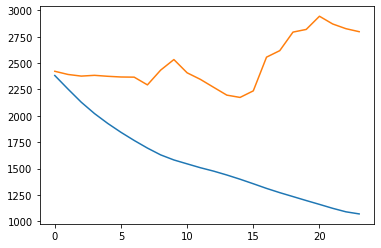

In [176]:
# plotanje radi usporedbe predviđene i dobivene vrijednosti
plt.figure()
plt.plot(list_pred)
plt.plot(list_co2zgb)